# HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS

**Problem Statement**
The goal of this project is to " predict the potentially fraudulent providers " based on the claims filed by them.along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.

A) Inpatient Data

This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit d diagnosis code.

B) Outpatient Data

This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.

C) Beneficiary Details Data

This data contains beneficiary KYC details like health conditions,regioregion they belong to etc

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-provider-fraud-detection-analysis/Test-1542969243754.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Outpatientdata-1542969243754.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Beneficiarydata-1542969243754.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Inpatientdata-1542969243754.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv


# Beneficiary 
This data contains beneficiary KYC details like health conditions,regioregion they belong to etc

## Data Preprocessing and EDA

In [2]:
df_train_ben = pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv")
df_train_ben = df_train_ben.drop_duplicates()
df_train_ben.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [3]:
df_train_ben.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [4]:
df_train_ben.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In total there are 138556 beneficiaries.

In [5]:
df_train_ben.shape

(138556, 25)

**Null Values**

In the Beneficiary dataset, DOD is the only column that mostly filled with NaN values.

<AxesSubplot:>

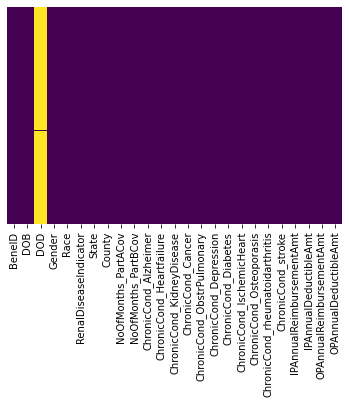

In [6]:
sns.heatmap(df_train_ben.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df_train_ben['DOD'] = pd.to_datetime(df_train_ben['DOD'], format='%Y-%m-%d')
df_train_ben['DOB'] = pd.to_datetime(df_train_ben['DOB'], format='%Y-%m-%d')

In [8]:
df_train_ben["DOD"].max()

Timestamp('2009-12-01 00:00:00')

In [9]:
df_train_ben[df_train_ben.DOD == df_train_ben.DOD.max()]

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
525,BENE11558,1927-12-01,2009-12-01,2,1,0,14,141,12,12,...,2,2,1,2,2,2,0,0,50,80
692,BENE11734,1929-04-01,2009-12-01,1,1,0,25,760,12,12,...,2,1,2,2,2,2,0,0,30,20
1667,BENE12787,1943-04-01,2009-12-01,1,1,0,42,450,12,12,...,1,2,2,1,2,2,0,0,1060,600
2766,BENE13946,1912-03-01,2009-12-01,2,1,0,15,450,12,12,...,2,2,2,2,2,2,0,0,30,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130779,BENE150858,1937-11-01,2009-12-01,1,1,0,31,200,12,12,...,2,2,2,1,2,2,0,0,1200,400
131036,BENE151130,1929-01-01,2009-12-01,1,1,0,5,400,12,12,...,1,1,1,2,2,2,7000,1068,100,0
135887,BENE156328,1936-10-01,2009-12-01,1,1,0,14,141,12,12,...,2,1,2,2,2,2,0,0,100,30
136789,BENE157302,1942-02-01,2009-12-01,1,1,0,23,680,12,12,...,2,2,1,2,2,2,0,0,1100,0


The most recent DOD value is December 1, 2009, which indicates that the Beneficiary Details data is from 2009.

Therefore NaN values in the DOD columns are filled with '2009-12-01' 

In [10]:
df_train_ben["DOD"].fillna("2009-12-01", inplace = True)

**Adding Age Column**

In [11]:
df_train_ben['Age'] = df_train_ben['DOD'].dt.year - df_train_ben['DOB'].dt.year

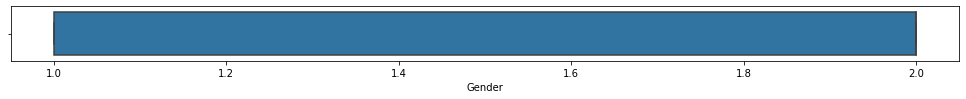

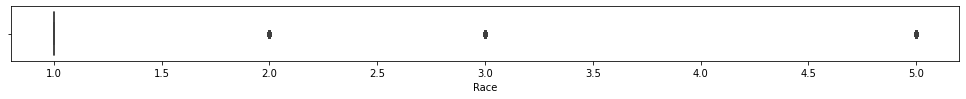

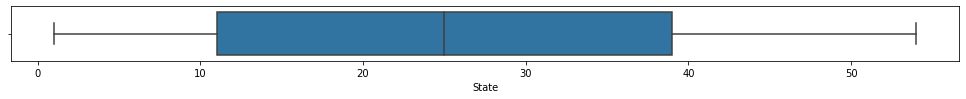

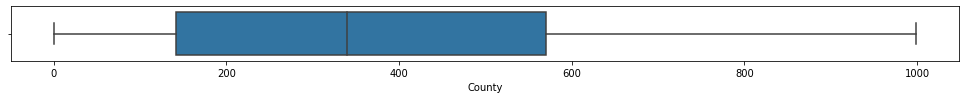

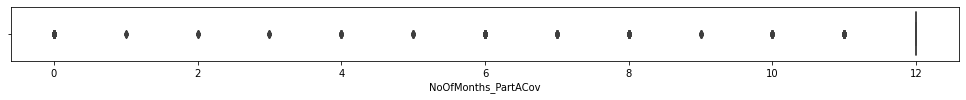

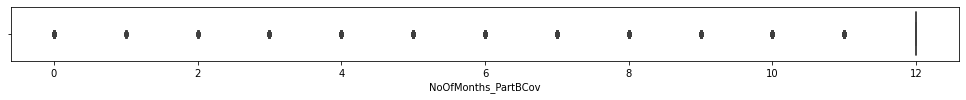

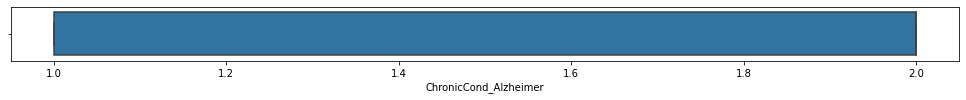

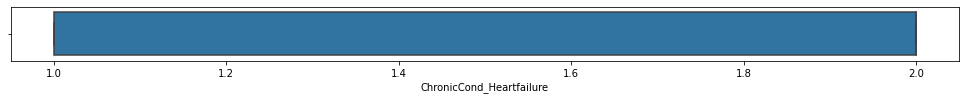

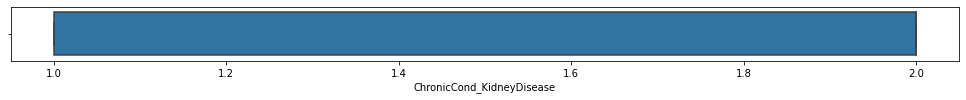

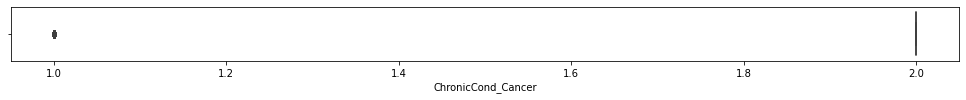

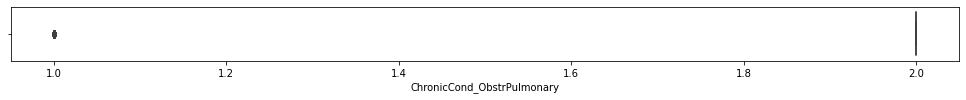

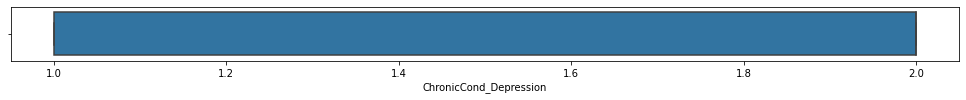

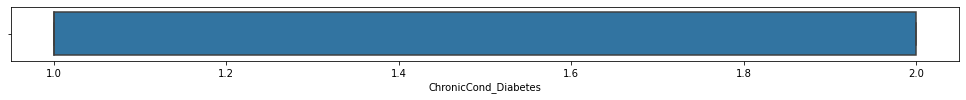

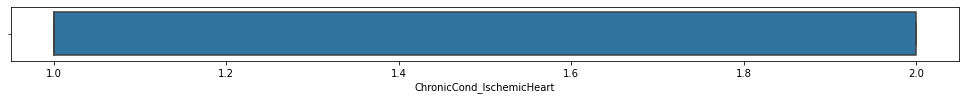

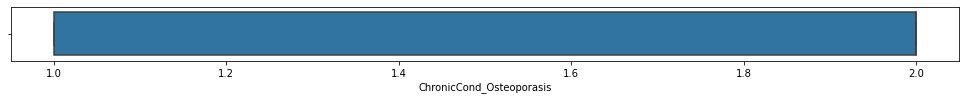

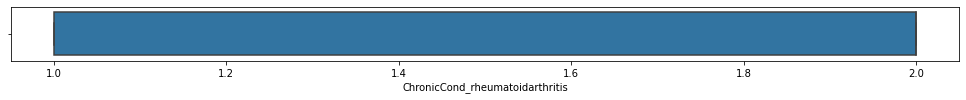

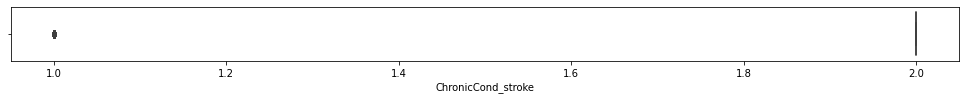

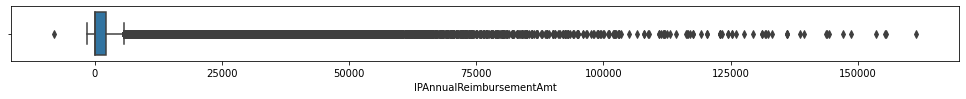

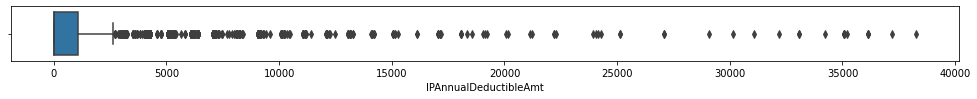

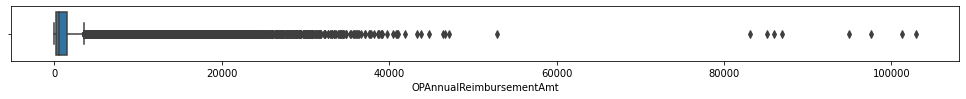

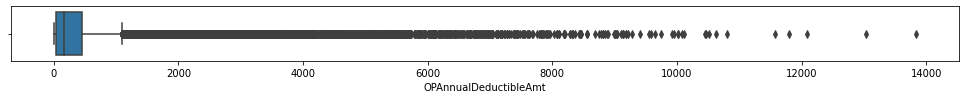

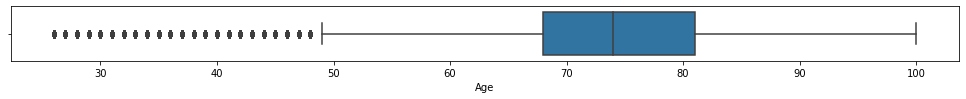

In [12]:
import matplotlib.pyplot as plt
df1=df_train_ben.select_dtypes(include=['int64'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

In [13]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
            
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

**Gender**

The gender column has a roughly even distribution of data, however the second gender accounts for 15% more entries.

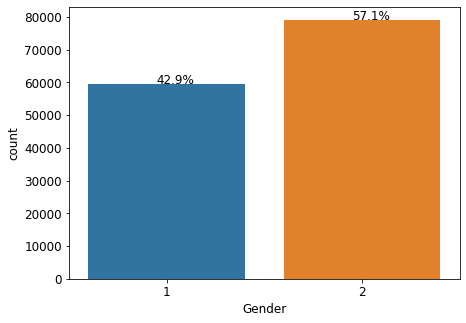

In [14]:
plt.figure(figsize=(7,5))
ax = sns.countplot('Gender', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('Gender', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.Gender)

**Race**

Race column has a data spread dominated by 1. 

It indicates that they are the majority of the Beneficiaries.

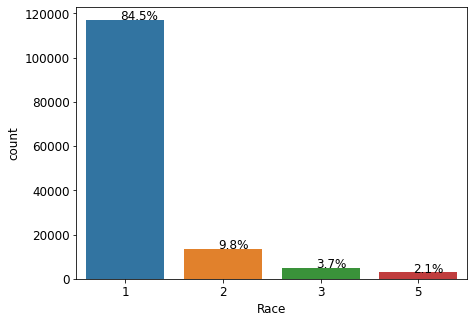

In [15]:
plt.figure(figsize=(7,5))
ax = sns.countplot('Race', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('Race', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.Race)

**Age**

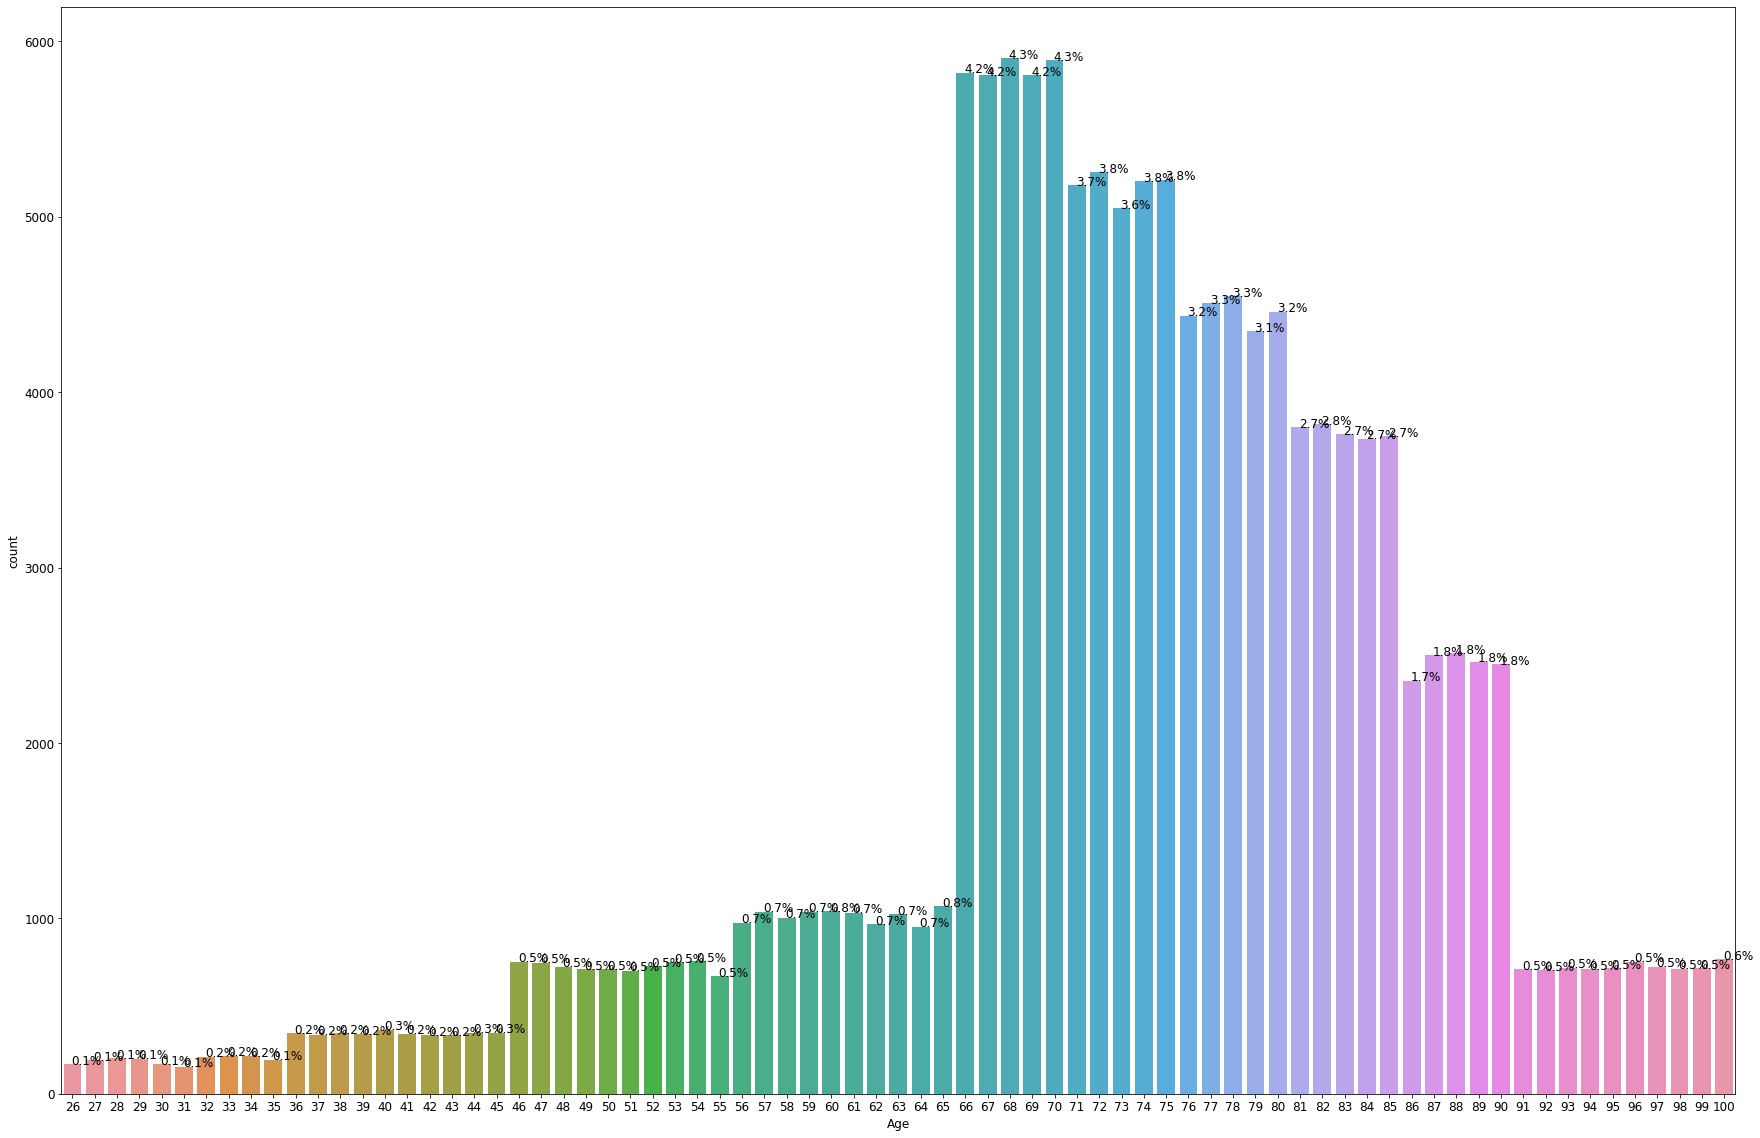

In [16]:
plt.figure(figsize=(30,20))
ax = sns.countplot('Age', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('Age', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.Age)

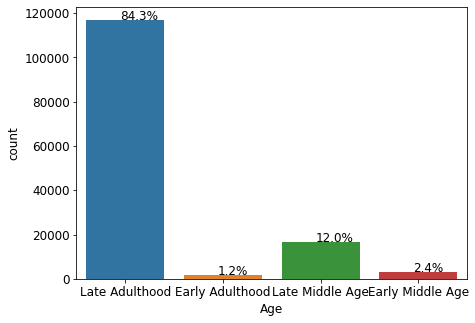

In [17]:
conditions = [
    (df_train_ben['Age'] <= 34),
    (df_train_ben['Age'] > 34) & (df_train_ben['Age'] <= 44),
    (df_train_ben['Age'] >= 45) & (df_train_ben['Age'] <= 64),
    (df_train_ben['Age'] >= 65)
    ]

values = ['Early Adulthood','Early Middle Age','Late Middle Age' ,'Late Adulthood']
df_train_ben['Age'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Age', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('Age', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.Age)

**State**

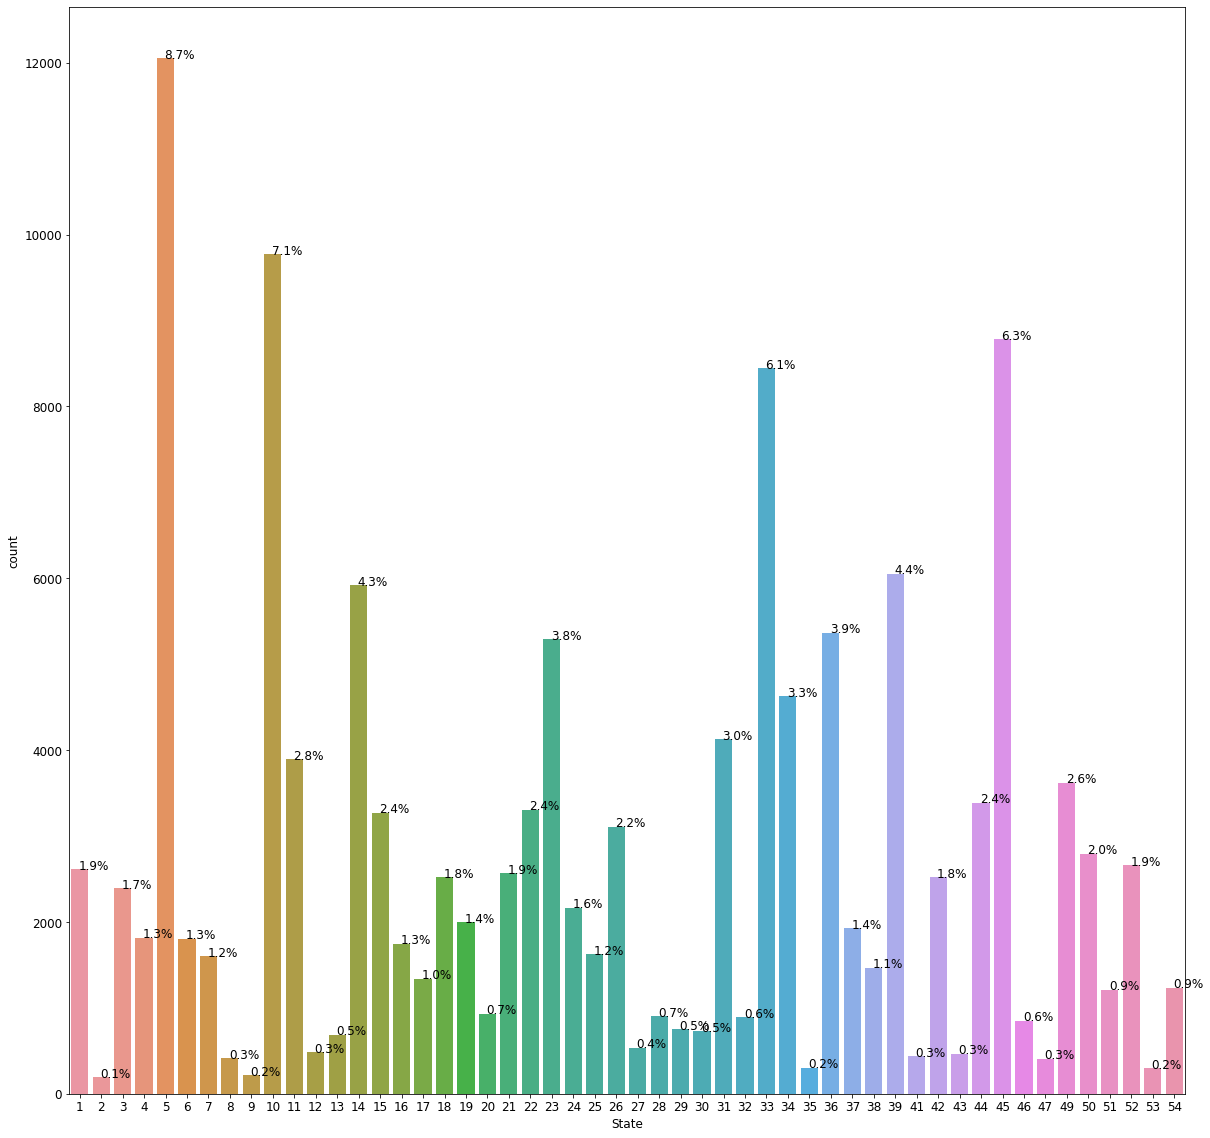

In [18]:
plt.figure(figsize=(20,20))
ax = sns.countplot('State', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('State', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.State)

**County**

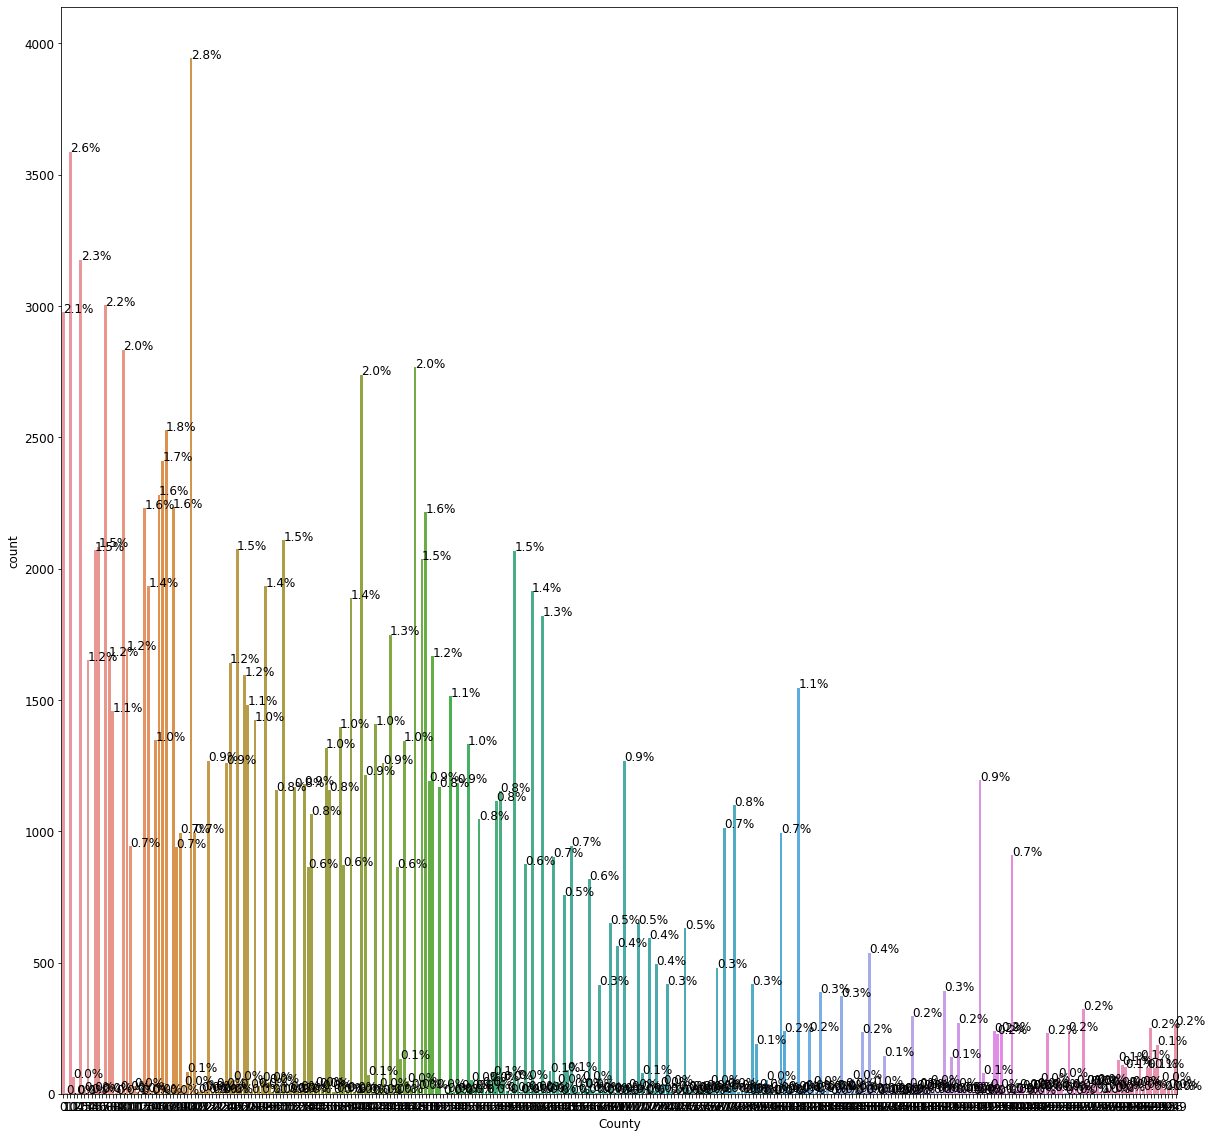

In [19]:
plt.figure(figsize=(20,20))
ax = sns.countplot('County', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('County', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.County)

**RenalDiseaseIndicator**

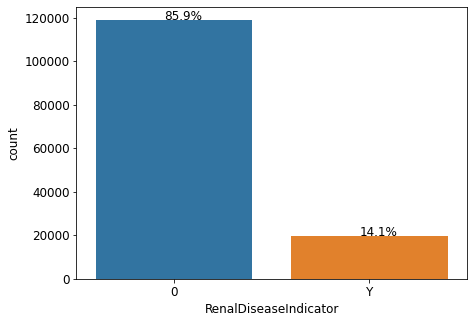

In [20]:
plt.figure(figsize=(7,5))
ax = sns.countplot('RenalDiseaseIndicator', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('RenalDiseaseIndicator', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.RenalDiseaseIndicator)

**NoOfMonths_PartACov**

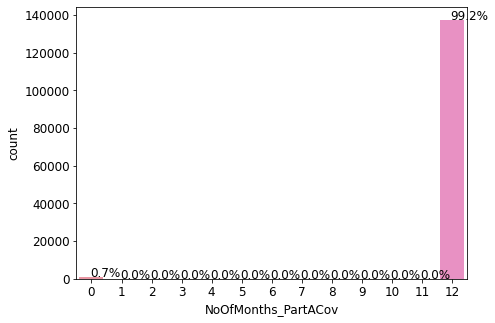

In [21]:
plt.figure(figsize=(7,5))
ax = sns.countplot('NoOfMonths_PartACov', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('NoOfMonths_PartACov', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.NoOfMonths_PartACov)

In [22]:
df_train_ben = df_train_ben.drop('NoOfMonths_PartACov', axis=1)

**NoOfMonths_PartBCov**

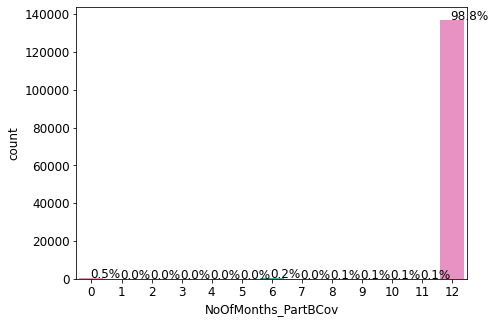

In [23]:
plt.figure(figsize=(7,5))
ax = sns.countplot('NoOfMonths_PartBCov', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('NoOfMonths_PartBCov', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.NoOfMonths_PartBCov)

In [24]:
df_train_ben = df_train_ben.drop('NoOfMonths_PartBCov', axis=1)

**ChronicCond_Alzheimer**

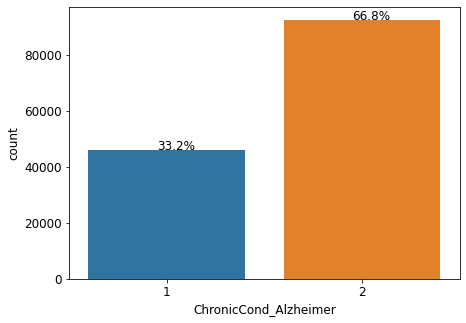

In [25]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_Alzheimer', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_Alzheimer', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.ChronicCond_Alzheimer)

**ChronicCond_Heartfailure**

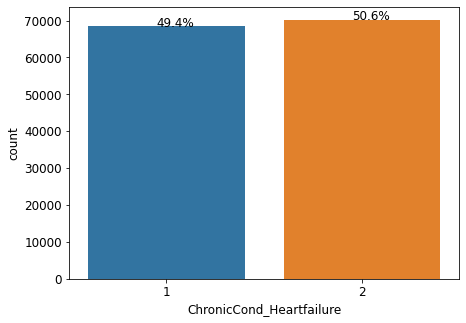

In [26]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_Heartfailure', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_Heartfailure', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.ChronicCond_Heartfailure)

**ChronicCond_KidneyDisease**

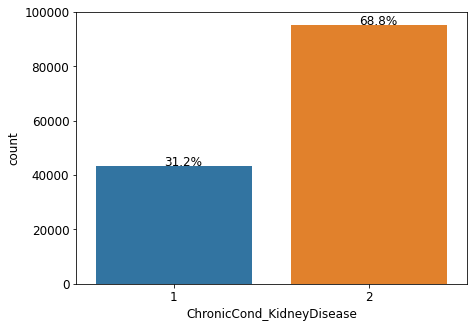

In [27]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_KidneyDisease', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_KidneyDisease', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.ChronicCond_KidneyDisease)

**ChronicCond_Cancer**

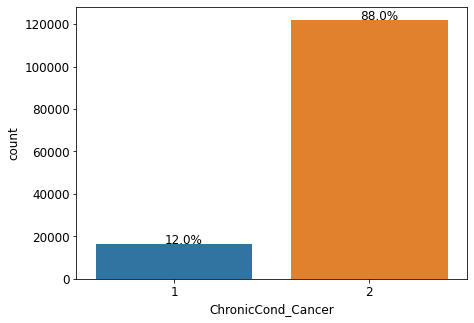

In [28]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_Cancer', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_Cancer', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.ChronicCond_Cancer)

**ChronicCond_ObstrPulmonary**

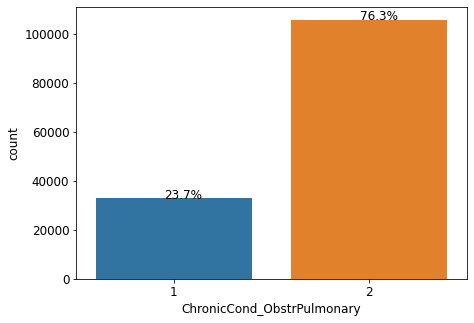

In [29]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_ObstrPulmonary', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_ObstrPulmonary', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.ChronicCond_ObstrPulmonary)

**ChronicCond_Depression**

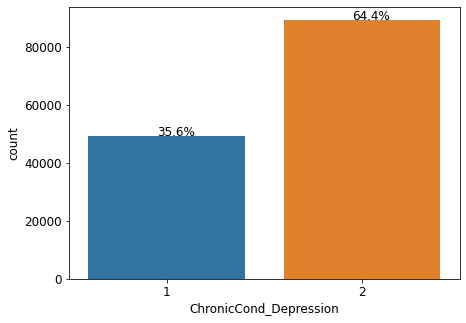

In [30]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_Depression', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_Depression', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.ChronicCond_Depression)

**ChronicCond_Diabetes**

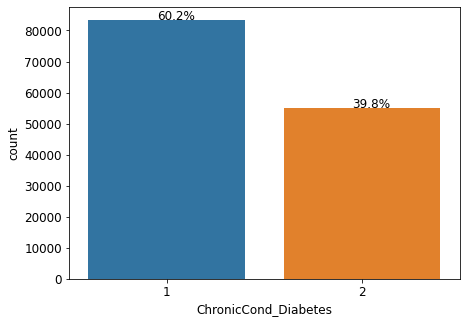

In [31]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_Diabetes', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_Diabetes', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.ChronicCond_Depression)

**ChronicCond_IschemicHeart**

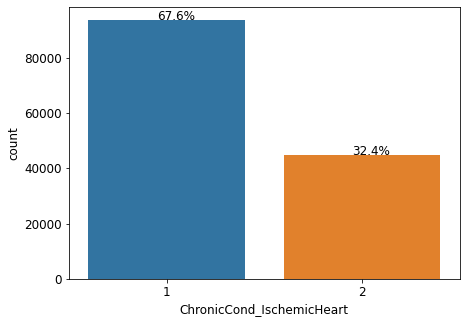

In [32]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_IschemicHeart', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_IschemicHeart', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.ChronicCond_IschemicHeart)

**ChronicCond_Osteoporasis**

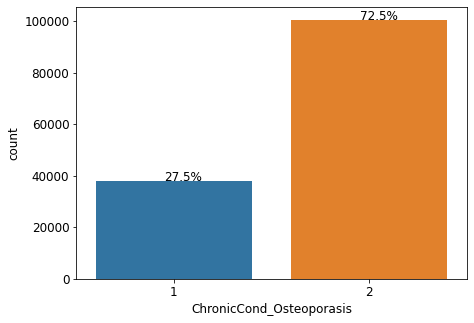

In [33]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_Osteoporasis', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_Osteoporasis', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.ChronicCond_Osteoporasis)

**ChronicCond_rheumatoidarthritis**

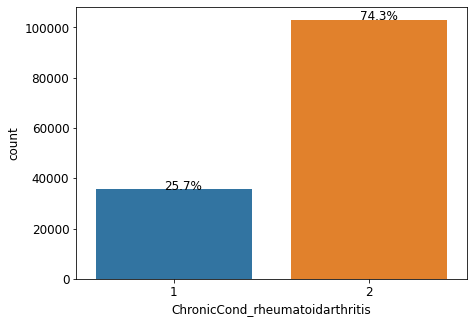

In [34]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_rheumatoidarthritis', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_rheumatoidarthritis', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.ChronicCond_rheumatoidarthritis)

**ChronicCond_stroke**

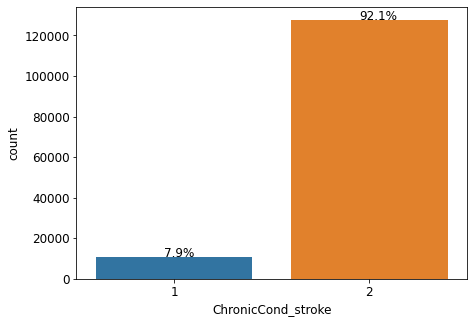

In [35]:
plt.figure(figsize=(7,5))
ax = sns.countplot('ChronicCond_stroke', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('ChronicCond_stroke', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.ChronicCond_stroke)

# Provider Data
Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraud claims. Therefore, focusing first on the Provider would be the best option for now.

In [36]:
df_train_prov = pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv")
df_train_prov.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


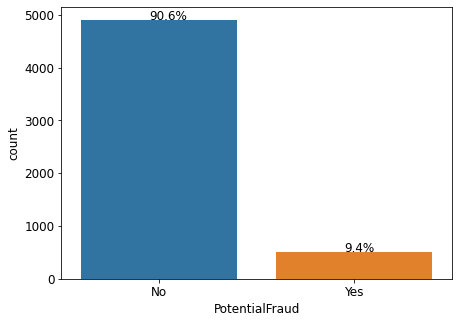

In [37]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_prov)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_prov.PotentialFraud)

In [38]:
df_fraud_prov = df_train_prov[df_train_prov.PotentialFraud == 'Yes']
df_fraud_prov.head()

,Provider,PotentialFraud
1,PRV51003,Yes
3,PRV51005,Yes
13,PRV51021,Yes
25,PRV51037,Yes
37,PRV51052,Yes


There are 506 potential fraud providers.

In [39]:
df_fraud_prov.shape

(506, 2)

# Inpatient Data

In [40]:
df_train_ip = pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv")
df_train_ip.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [41]:
df_train_ip.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [42]:
df_train_ip.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [43]:
df_train_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [44]:
df_train_ip.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [45]:
df_train_ip.shape

(40474, 30)

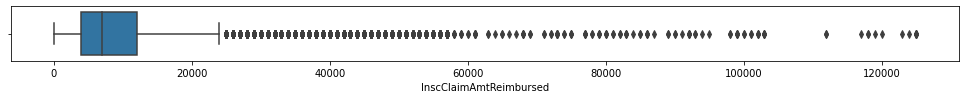

In [46]:
import matplotlib.pyplot as plt
df1=df_train_ip.select_dtypes(include=['int64'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

<AxesSubplot:>

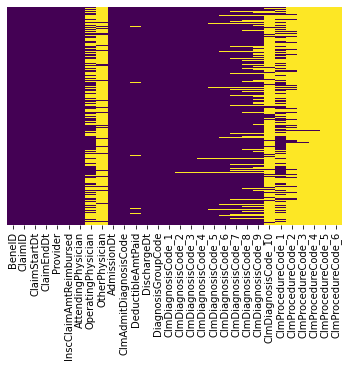

In [47]:
sns.heatmap(df_train_ip.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
df_train_ip['AttendingPhysician'] = df_train_ip['AttendingPhysician'].fillna("None")
df_train_ip['OperatingPhysician'] = df_train_ip['OperatingPhysician'].fillna("None")
df_train_ip['OtherPhysician'] = df_train_ip['OtherPhysician'].fillna("None")

In [49]:
df_train_ip = df_train_ip.fillna("0")

In [50]:
df_train_ip['BeneID'].nunique()

31289

In [51]:
df_train_ip['BeneID'].value_counts()

BENE134170    8
BENE64791     7
BENE121796    7
BENE117116    7
BENE119457    7
             ..
BENE67673     1
BENE67658     1
BENE67655     1
BENE67653     1
BENE159188    1
Name: BeneID, Length: 31289, dtype: int64

In [52]:
df_train_ben["has_claimed_ip"] = df_train_ben["BeneID"].isin(df_train_ip["BeneID"])

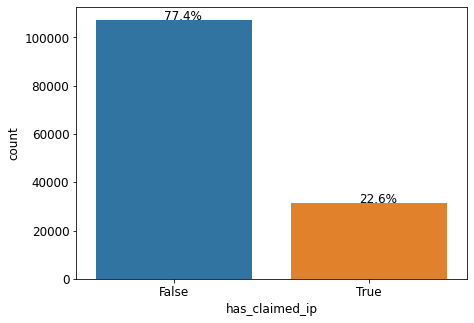

In [53]:
plt.figure(figsize=(7,5))
ax = sns.countplot('has_claimed_ip', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('has_claimed_ip', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.has_claimed_ip)

**Adding Claim Duration**

In [54]:
df_train_ip['ClaimEndDt'] = pd.to_datetime(df_train_ip['ClaimEndDt'], format='%Y-%m-%d')
df_train_ip['ClaimStartDt'] = pd.to_datetime(df_train_ip['ClaimStartDt'], format='%Y-%m-%d')

In [55]:
df_train_ip["claim_duration"] = (df_train_ip['ClaimEndDt'] - df_train_ip['ClaimStartDt']).dt.days
df_train_ip.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,claim_duration
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,19889,5849,0,0,0,0,0,0,0,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,0,0,0,7092.0,0,0,0,0,0,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,0,0,0,0,0,0,0,0,0,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,0,331.0,0,0,0,0,0,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,29620,20300,0,3893.0,0,0,0,0,0,17


**Merging IP data to the Provider data**

In [56]:
df_train_ip = df_train_ip.join(df_train_prov.set_index('Provider'), on='Provider')

In [57]:
df_train_ip.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'claim_duration', 'PotentialFraud'],
      dtype='object')

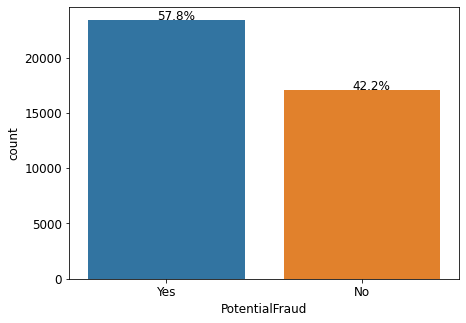

In [58]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_ip)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ip.PotentialFraud)

In [59]:
df_train_ip['AttendingPhysician'].nunique()

11605

In [60]:
df_train_ip['OperatingPhysician'].nunique()

8288

In [61]:
df_train_ip.shape

(40474, 32)

**Adding Beneficiaries data to Claim data**

In [62]:
df_train_ip_total = df_train_ip.join(df_train_ben.set_index('BeneID'), on='BeneID')
df_train_ip_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,1,2,1,1,36000,3204,60,70,Late Adulthood,True
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,1,2,1,1,36000,3204,60,70,Late Adulthood,True
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,1,2,1,1,36000,3204,60,70,Late Adulthood,True
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,2,2,1,1,5000,1068,250,320,Late Adulthood,True
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,1,2,2,2,21260,2136,120,100,Late Adulthood,True


In [63]:
df_train_ip_total['ChronicCond_Alzheimer'].unique()

array([1, 2])

<AxesSubplot:>

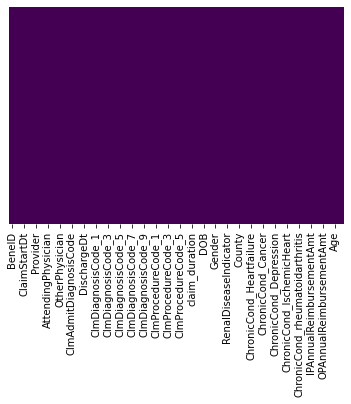

In [64]:
sns.heatmap(df_train_ip_total.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [65]:
df_train_ip_total

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,1,2,1,1,36000,3204,60,70,Late Adulthood,True
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,1,2,1,1,36000,3204,60,70,Late Adulthood,True
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,1,2,1,1,36000,3204,60,70,Late Adulthood,True
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,2,2,1,1,5000,1068,250,320,Late Adulthood,True
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,1,2,2,2,21260,2136,120,100,Late Adulthood,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,None,2009-09-28,...,1,2,1,2,11400,2136,520,280,Late Middle Age,True
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,None,2009-11-03,...,1,2,2,2,4000,1068,0,0,Late Middle Age,True
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,None,2009-11-18,...,1,1,1,2,8000,2136,1920,400,Late Adulthood,True
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,None,None,2009-12-17,...,1,1,1,2,8000,2136,1920,400,Late Adulthood,True


## Diseases

### ChronicCond_Alzheimer

In [66]:
# df_train_ip_Alz = df_train_ip_total[(df_train_ip_total['ChronicCond_Alzheimer'] == 1) & (df_train_ip_total['ChronicCond_Heartfailure'] == 2) & (df_train_ip_total['ChronicCond_KidneyDisease'] == 2) & (df_train_ip_total['ChronicCond_Cancer'] == 2) & (df_train_ip_total['ChronicCond_ObstrPulmonary'] == 2) & (df_train_ip_total['ChronicCond_Depression'] == 2) & (df_train_ip_total['ChronicCond_Diabetes'] == 2) & (df_train_ip_total['ChronicCond_IschemicHeart'] == 2) & (df_train_ip_total['ChronicCond_Osteoporasis'] == 2) & (df_train_ip_total['ChronicCond_rheumatoidarthritis'] == 2)& (df_train_ip_total['ChronicCond_stroke'] == 2)]
df_train_ip_Alz = df_train_ip_total[df_train_ip_total['ChronicCond_Alzheimer'] == 1]
df_train_ip_Alz.shape

(20401, 56)

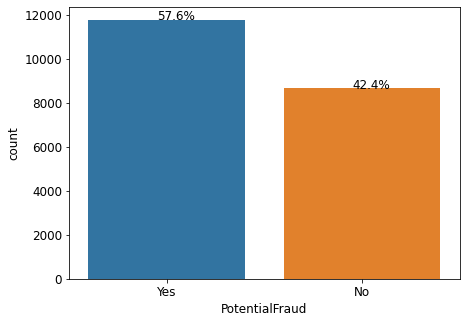

In [67]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_ip_Alz)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ip_Alz.PotentialFraud)

Let's see the average cost of inpatient Alzheimer Patient

In [68]:
df_train_ip_Alz_not_fraud = df_train_ip_Alz[df_train_ip_Alz['PotentialFraud'] == "No"]

In [69]:
df_train_ip_Alz_not_fraud.shape

(8645, 56)

In [70]:
df_train_ip_Alz_not_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,1,2,1,1,36000,3204,60,70,Late Adulthood,True
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,1,2,1,1,36000,3204,60,70,Late Adulthood,True
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,None,2009-01-02,...,1,1,1,2,8000,1068,860,50,Late Adulthood,True
12,BENE11037,CLM65412,2009-08-26,2009-08-29,PRV55846,3000,PHY363584,PHY364336,None,2009-08-26,...,1,1,1,1,3150,1068,160,50,Late Adulthood,True
25,BENE11067,CLM37565,2009-02-09,2009-02-15,PRV51710,4000,PHY433429,None,None,2009-02-09,...,1,1,2,2,4000,1068,2150,570,Late Middle Age,True


In [71]:
df_train_ip_Alz_not_fraud.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                                object
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                          object
DischargeDt                                object
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


In [72]:
df_train_ip_Alz_not_fraud.describe()

,InscClaimAmtReimbursed,claim_duration,Gender,Race,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.0,8645.00000,8645.000000,8645.000000,...,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,9509.234239,5.726316,1.595836,1.241411,25.839445,401.755003,1.0,1.21203,1.328629,1.796530,...,1.425217,1.140081,1.099248,1.612608,1.605321,1.791787,18806.006940,2119.765414,2093.761712,592.317062
std,9429.560515,5.466067,0.490758,0.681376,15.398340,269.792216,0.0,0.40877,0.469742,0.402603,...,0.494404,0.347091,0.299012,0.487183,0.488810,0.406053,18132.267012,1960.807352,3983.330038,1009.276537
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.0,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1068.000000,-50.000000,0.000000
25%,4000.000000,2.000000,1.000000,1.000000,11.000000,170.000000,1.0,1.00000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,7000.000000,1068.000000,260.000000,60.000000
50%,7000.000000,4.000000,2.000000,1.000000,25.000000,390.000000,1.0,1.00000,1.000000,2.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,13000.000000,2136.000000,890.000000,260.000000
75%,11000.000000,7.000000,2.000000,1.000000,39.000000,590.000000,1.0,1.00000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,24180.000000,2136.000000,2220.000000,700.000000
max,125000.000000,35.000000,2.000000,5.000000,54.000000,999.000000,1.0,2.00000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,155600.000000,36136.000000,83160.000000,10800.000000


In [73]:
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

In [74]:
conditions = [
    (df_train_ip_Alz['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_ip_Alz['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_ip_Alz['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_ip_Alz['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_ip_Alz['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_ip_Alz['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_ip_Alz['Alz_claim_ip_insurance_tier'] = np.select(conditions, values)

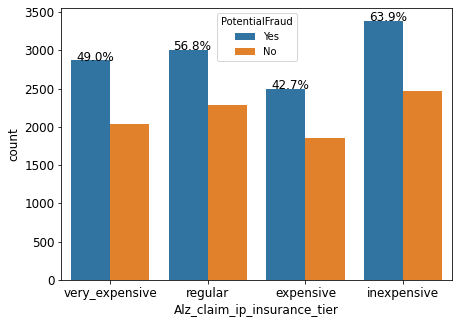

In [75]:
plt.figure(figsize=(7,5))
ax = sns.countplot('Alz_claim_ip_insurance_tier', hue= 'PotentialFraud', data = df_train_ip_Alz)
plt.xticks(size = 12)
plt.xlabel('Alz_claim_ip_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_ip_Alz.Alz_claim_ip_insurance_tier,2,2)

In [76]:
df_train_ip_Alz.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,Alz_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,2,1,1,36000,3204,60,70,Late Adulthood,True,very_expensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,2,1,1,36000,3204,60,70,Late Adulthood,True,regular
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,2,1,1,36000,3204,60,70,Late Adulthood,True,regular
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2,1,1,22000,2136,1400,840,Late Adulthood,True,expensive
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,None,2009-01-02,...,1,1,2,8000,1068,860,50,Late Adulthood,True,expensive


In [77]:
df_train_ip_Alz.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                                object
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                          object
DischargeDt                                object
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


In [78]:
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_ip_Alz['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_ip_Alz['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_ip_Alz['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_ip_Alz['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_ip_Alz['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_ip_Alz['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_ip_Alz['Alz_claim_ip_insurance_tier'] = np.select(conditions, values)

In [79]:
df_train_ip_total['Alz_claim_ip_insurance_tier'] = df_train_ip_Alz['Alz_claim_ip_insurance_tier']
df_train_ip_total["Alz_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_train_ip_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,Alz_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,2,1,1,36000,3204,60,70,Late Adulthood,True,very_expensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,2,1,1,36000,3204,60,70,Late Adulthood,True,regular
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,2,1,1,36000,3204,60,70,Late Adulthood,True,regular
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,2,1,1,5000,1068,250,320,Late Adulthood,True,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,2,2,2,21260,2136,120,100,Late Adulthood,True,None


### Heartfailure

In [80]:
# df_train_ip_Alz = df_train_ip_total[(df_train_ip_total['ChronicCond_Alzheimer'] == 1) & (df_train_ip_total['ChronicCond_Heartfailure'] == 2) & (df_train_ip_total['ChronicCond_KidneyDisease'] == 2) & (df_train_ip_total['ChronicCond_Cancer'] == 2) & (df_train_ip_total['ChronicCond_ObstrPulmonary'] == 2) & (df_train_ip_total['ChronicCond_Depression'] == 2) & (df_train_ip_total['ChronicCond_Diabetes'] == 2) & (df_train_ip_total['ChronicCond_IschemicHeart'] == 2) & (df_train_ip_total['ChronicCond_Osteoporasis'] == 2) & (df_train_ip_total['ChronicCond_rheumatoidarthritis'] == 2)& (df_train_ip_total['ChronicCond_stroke'] == 2)]
df_train_ip_Hf = df_train_ip_total[df_train_ip_total['ChronicCond_Heartfailure'] == 1]
df_train_ip_Hf.shape

(29215, 57)

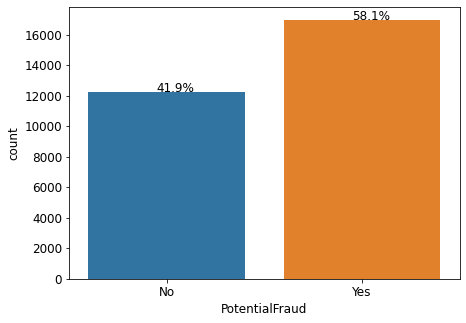

In [81]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_ip_Hf)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ip_Hf.PotentialFraud)

In [82]:
df_train_ip_Hf_not_fraud = df_train_ip_Hf[df_train_ip_Hf['PotentialFraud'] == "No"]

In [83]:
df_train_ip_Hf_not_fraud.shape

(12245, 57)

In [84]:
df_train_ip_Hf_not_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,Alz_claim_ip_insurance_tier
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,2,1,1,5000,1068,250,320,Late Adulthood,True,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,2,2,2,21260,2136,120,100,Late Adulthood,True,None
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,None,2009-01-02,...,1,1,2,8000,1068,860,50,Late Adulthood,True,expensive
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,None,None,2009-08-06,...,1,2,2,23650,2136,40,0,Late Adulthood,True,None
12,BENE11037,CLM65412,2009-08-26,2009-08-29,PRV55846,3000,PHY363584,PHY364336,None,2009-08-26,...,1,1,1,3150,1068,160,50,Late Adulthood,True,inexpensive


In [85]:
df_train_ip_Hf_not_fraud.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                                object
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                          object
DischargeDt                                object
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


In [86]:
df_train_ip_Hf_not_fraud.describe()

,InscClaimAmtReimbursed,claim_duration,Gender,Race,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.0,12245.000000,12245.000000,...,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000
mean,9912.136382,5.762270,1.581298,1.243691,25.739241,404.292609,1.443691,1.0,1.317926,1.796733,...,1.458310,1.141200,1.096121,1.628420,1.612903,1.809473,18869.224990,2036.448510,2147.536137,602.314822
std,9854.689773,5.518412,0.493366,0.686883,15.502812,269.528443,0.496840,0.0,0.465689,0.402446,...,0.498279,0.348242,0.294769,0.483247,0.487106,0.392733,18289.888991,1811.536378,4164.887430,1040.716557
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-20.000000,0.000000
25%,4000.000000,2.000000,1.000000,1.000000,11.000000,170.000000,1.000000,1.0,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,7000.000000,1068.000000,250.000000,60.000000
50%,7000.000000,4.000000,2.000000,1.000000,25.000000,400.000000,1.000000,1.0,1.000000,2.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,13000.000000,1368.000000,890.000000,260.000000
75%,12000.000000,7.000000,2.000000,1.000000,39.000000,600.000000,2.000000,1.0,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,24120.000000,2136.000000,2280.000000,700.000000
max,125000.000000,35.000000,2.000000,5.000000,54.000000,999.000000,2.000000,1.0,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,155600.000000,38272.000000,97510.000000,12090.000000


In [87]:
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_ip_Hf_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

In [88]:
conditions = [
    (df_train_ip_Hf['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_ip_Hf['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_ip_Hf['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_ip_Hf['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_ip_Hf['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_ip_Hf['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_ip_Hf['Hf_claim_ip_insurance_tier'] = np.select(conditions, values)

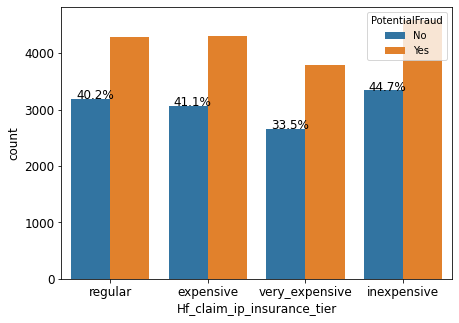

In [89]:
plt.figure(figsize=(7,5))
ax = sns.countplot('Hf_claim_ip_insurance_tier', hue= 'PotentialFraud', data = df_train_ip_Hf)
plt.xticks(size = 12)
plt.xlabel('Hf_claim_ip_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_ip_Hf.Hf_claim_ip_insurance_tier,2,2)

In [90]:
df_train_ip_total['Hf_claim_ip_insurance_tier'] = df_train_ip_Hf['Hf_claim_ip_insurance_tier']
df_train_ip_total["Hf_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_train_ip_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,1,1,36000,3204,60,70,Late Adulthood,True,very_expensive,None
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,1,1,36000,3204,60,70,Late Adulthood,True,regular,None
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,1,1,36000,3204,60,70,Late Adulthood,True,regular,None
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,5000,1068,250,320,Late Adulthood,True,None,regular
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,2,2,21260,2136,120,100,Late Adulthood,True,None,expensive


### KidneyDisease

In [91]:
# df_train_ip_Alz = df_train_ip_total[(df_train_ip_total['ChronicCond_Alzheimer'] == 1) & (df_train_ip_total['ChronicCond_Heartfailure'] == 2) & (df_train_ip_total['ChronicCond_KidneyDisease'] == 2) & (df_train_ip_total['ChronicCond_Cancer'] == 2) & (df_train_ip_total['ChronicCond_ObstrPulmonary'] == 2) & (df_train_ip_total['ChronicCond_Depression'] == 2) & (df_train_ip_total['ChronicCond_Diabetes'] == 2) & (df_train_ip_total['ChronicCond_IschemicHeart'] == 2) & (df_train_ip_total['ChronicCond_Osteoporasis'] == 2) & (df_train_ip_total['ChronicCond_rheumatoidarthritis'] == 2)& (df_train_ip_total['ChronicCond_stroke'] == 2)]
df_train_ip_Kd = df_train_ip_total[df_train_ip_total['ChronicCond_KidneyDisease'] == 1]
df_train_ip_Kd.shape

(24356, 58)

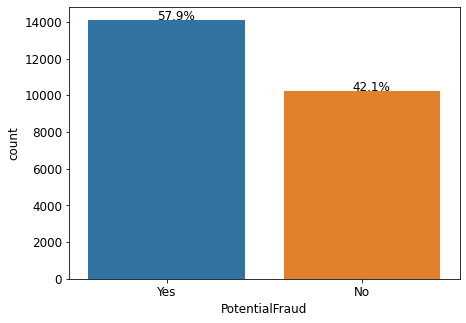

In [92]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_ip_Kd)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ip_Kd.PotentialFraud)

In [93]:
df_train_ip_Kd_not_fraud = df_train_ip_Kd[df_train_ip_Kd['PotentialFraud'] == "No"]

In [94]:
df_train_ip_Kd_not_fraud.shape

(10253, 58)

In [95]:
df_train_ip_Kd_not_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,1,1,36000,3204,60,70,Late Adulthood,True,regular,None
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,1,1,36000,3204,60,70,Late Adulthood,True,regular,None
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,5000,1068,250,320,Late Adulthood,True,None,regular
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,2,2,21260,2136,120,100,Late Adulthood,True,None,expensive
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,None,None,2009-08-06,...,2,2,23650,2136,40,0,Late Adulthood,True,None,regular


In [96]:
df_train_ip_Kd_not_fraud.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                                object
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                          object
DischargeDt                                object
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


In [97]:
df_train_ip_Kd_not_fraud.describe()

,InscClaimAmtReimbursed,claim_duration,Gender,Race,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.0,10253.000000,...,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000
mean,10336.053838,6.000293,1.581293,1.246172,25.619721,404.246269,1.433922,1.185409,1.0,1.787574,...,1.452550,1.122696,1.093143,1.624110,1.608017,1.798986,20328.513606,2134.983712,2371.795572,662.725446
std,10198.497253,5.625306,0.493371,0.690543,15.457253,270.107668,0.495639,0.388648,0.0,0.409044,...,0.497768,0.328104,0.290648,0.484375,0.488217,0.400778,19031.472045,1912.861911,4375.138317,1134.114015
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-10.000000,0.000000
25%,4000.000000,3.000000,1.000000,1.000000,11.000000,170.000000,1.000000,1.000000,1.0,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,7820.000000,1068.000000,280.000000,70.000000
50%,7000.000000,4.000000,2.000000,1.000000,25.000000,400.000000,1.000000,1.000000,1.0,2.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,14000.000000,2136.000000,940.000000,280.000000
75%,12000.000000,7.000000,2.000000,1.000000,39.000000,600.000000,2.000000,1.000000,1.0,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,26130.000000,2136.000000,2490.000000,770.000000
max,125000.000000,35.000000,2.000000,5.000000,54.000000,999.000000,2.000000,2.000000,1.0,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,155600.000000,38272.000000,52900.000000,12090.000000


In [98]:
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_ip_Kd_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

In [99]:
conditions = [
    (df_train_ip_Kd['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_ip_Kd['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_ip_Kd['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_ip_Kd['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_ip_Kd['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_ip_Kd['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_ip_Kd['Kd_claim_insurance_tier'] = np.select(conditions, values)

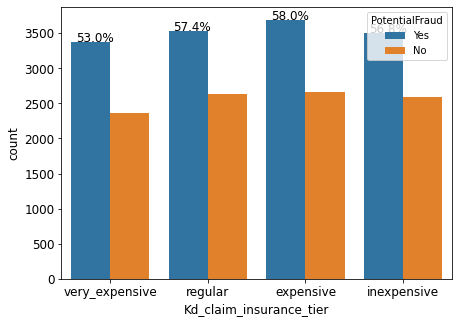

In [100]:
plt.figure(figsize=(7,5))
ax = sns.countplot('Kd_claim_insurance_tier', hue= 'PotentialFraud', data = df_train_ip_Kd)
plt.xticks(size = 12)
plt.xlabel('Kd_claim_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_ip_Kd.Kd_claim_insurance_tier,2,2)

In [101]:
df_train_ip_total['Kd_claim_insurance_tier'] = df_train_ip_Kd['Kd_claim_insurance_tier']
df_train_ip_total["Kd_claim_insurance_tier"].fillna("None", inplace = True)
df_train_ip_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,1,36000,3204,60,70,Late Adulthood,True,very_expensive,None,very_expensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,1,36000,3204,60,70,Late Adulthood,True,regular,None,regular
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,1,36000,3204,60,70,Late Adulthood,True,regular,None,regular
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,5000,1068,250,320,Late Adulthood,True,None,regular,regular
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,2,21260,2136,120,100,Late Adulthood,True,None,expensive,expensive


### Cancer

In [102]:
# df_train_ip_Alz = df_train_ip_total[(df_train_ip_total['ChronicCond_Alzheimer'] == 1) & (df_train_ip_total['ChronicCond_Heartfailure'] == 2) & (df_train_ip_total['ChronicCond_KidneyDisease'] == 2) & (df_train_ip_total['ChronicCond_Cancer'] == 2) & (df_train_ip_total['ChronicCond_ObstrPulmonary'] == 2) & (df_train_ip_total['ChronicCond_Depression'] == 2) & (df_train_ip_total['ChronicCond_Diabetes'] == 2) & (df_train_ip_total['ChronicCond_IschemicHeart'] == 2) & (df_train_ip_total['ChronicCond_Osteoporasis'] == 2) & (df_train_ip_total['ChronicCond_rheumatoidarthritis'] == 2)& (df_train_ip_total['ChronicCond_stroke'] == 2)]
df_train_ip_Ca = df_train_ip_total[df_train_ip_total['ChronicCond_Cancer'] == 1]
df_train_ip_Ca.shape

(7729, 59)

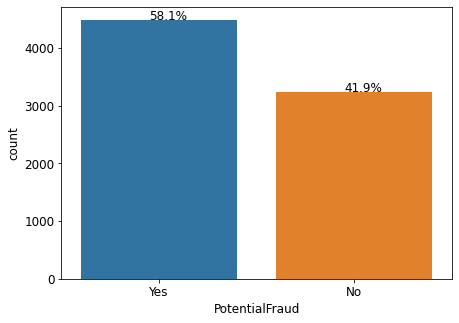

In [103]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_ip_Ca)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ip_Ca.PotentialFraud)

In [104]:
df_train_ip_Ca_not_fraud = df_train_ip_Ca[df_train_ip_Ca['PotentialFraud'] == "No"]

In [105]:
df_train_ip_Ca_not_fraud.shape

(3241, 59)

In [106]:
df_train_ip_Ca_not_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,None,2009-01-02,...,2,8000,1068,860,50,Late Adulthood,True,expensive,expensive,None
99,BENE11349,CLM36790,2009-02-03,2009-02-07,PRV54653,12000,PHY311469,PHY333175,None,2009-02-03,...,2,12160,1068,460,20,Late Middle Age,True,None,expensive,expensive
103,BENE11366,CLM39427,2009-02-21,2009-02-23,PRV55846,0,PHY321109,PHY324538,None,2009-02-21,...,2,5440,2136,4050,310,Late Adulthood,True,inexpensive,inexpensive,inexpensive
104,BENE11374,CLM59661,2009-07-14,2009-07-15,PRV54917,3000,PHY384992,None,None,2009-07-14,...,2,3000,1068,1770,510,Late Adulthood,True,inexpensive,inexpensive,inexpensive
107,BENE11380,CLM51126,2009-05-14,2009-05-26,PRV54348,17000,PHY370193,PHY312648,None,2009-05-14,...,2,27130,2136,280,220,Late Adulthood,True,None,very_expensive,None


In [107]:
df_train_ip_Ca_not_fraud.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                                object
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                          object
DischargeDt                                object
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


In [108]:
df_train_ip_Ca_not_fraud.describe()

,InscClaimAmtReimbursed,claim_duration,Gender,Race,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.0,...,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000
mean,9886.701635,5.780623,1.558470,1.219377,25.538106,399.265042,1.457266,1.232027,1.327985,1.0,...,1.477013,1.149028,1.099969,1.628818,1.593335,1.818883,19559.506325,2099.074360,2071.693922,590.763345
std,9367.877819,5.408984,0.496646,0.645264,15.232514,269.047951,0.498247,0.422191,0.469552,0.0,...,0.499548,0.356171,0.300005,0.483196,0.491287,0.385174,18306.488472,1844.356824,3555.998314,858.181492
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1068.000000,-10.000000,0.000000
25%,4000.000000,2.000000,1.000000,1.000000,11.000000,170.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,7060.000000,1068.000000,300.000000,80.000000
50%,7000.000000,4.000000,2.000000,1.000000,25.000000,390.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,14000.000000,2136.000000,1020.000000,300.000000
75%,12000.000000,7.000000,2.000000,1.000000,39.000000,590.000000,2.000000,1.000000,2.000000,1.0,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,26000.000000,2136.000000,2570.000000,780.000000
max,102000.000000,35.000000,2.000000,5.000000,54.000000,999.000000,2.000000,2.000000,2.000000,1.0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,153580.000000,38272.000000,85960.000000,9400.000000


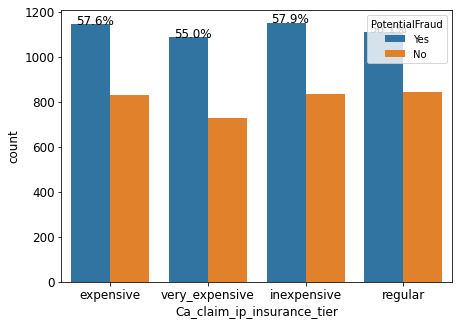

In [109]:
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_ip_Ca_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_ip_Ca['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_ip_Ca['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_ip_Ca['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_ip_Ca['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_ip_Ca['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_ip_Ca['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_ip_Ca['Ca_claim_ip_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Ca_claim_ip_insurance_tier', hue= 'PotentialFraud', data = df_train_ip_Ca)
plt.xticks(size = 12)
plt.xlabel('Ca_claim_ip_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_ip_Ca.Ca_claim_ip_insurance_tier,2,2)

In [110]:
df_train_ip_total['Ca_claim_ip_insurance_tier'] = df_train_ip_Ca['Ca_claim_ip_insurance_tier']
df_train_ip_total["Ca_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_train_ip_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,36000,3204,60,70,Late Adulthood,True,very_expensive,None,very_expensive,None
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,36000,3204,60,70,Late Adulthood,True,regular,None,regular,None
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,36000,3204,60,70,Late Adulthood,True,regular,None,regular,None
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,5000,1068,250,320,Late Adulthood,True,None,regular,regular,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,21260,2136,120,100,Late Adulthood,True,None,expensive,expensive,None


### ObstrPulmonary

In [111]:
# df_train_ip_Alz = df_train_ip_total[(df_train_ip_total['ChronicCond_Alzheimer'] == 1) & (df_train_ip_total['ChronicCond_Heartfailure'] == 2) & (df_train_ip_total['ChronicCond_KidneyDisease'] == 2) & (df_train_ip_total['ChronicCond_Cancer'] == 2) & (df_train_ip_total['ChronicCond_ObstrPulmonary'] == 2) & (df_train_ip_total['ChronicCond_Depression'] == 2) & (df_train_ip_total['ChronicCond_Diabetes'] == 2) & (df_train_ip_total['ChronicCond_IschemicHeart'] == 2) & (df_train_ip_total['ChronicCond_Osteoporasis'] == 2) & (df_train_ip_total['ChronicCond_rheumatoidarthritis'] == 2)& (df_train_ip_total['ChronicCond_stroke'] == 2)]
df_train_ip_Obs = df_train_ip_total[df_train_ip_total['ChronicCond_ObstrPulmonary'] == 1]
df_train_ip_Obs.shape

(19393, 60)

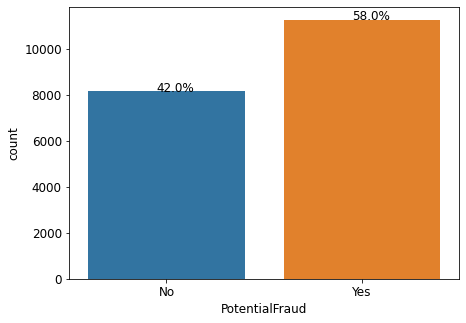

In [112]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_ip_Obs)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ip_Obs.PotentialFraud)

In [113]:
df_train_ip_Obs_not_fraud = df_train_ip_Obs[df_train_ip_Obs['PotentialFraud'] == "No"]

In [114]:
df_train_ip_Obs_not_fraud.shape

(8142, 60)

In [115]:
df_train_ip_Obs_not_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,21260,2136,120,100,Late Adulthood,True,None,expensive,expensive,None
21,BENE11057,CLM38115,2009-02-12,2009-02-18,PRV51342,10000,PHY375861,None,None,2009-02-12,...,41080,2136,200,50,Late Adulthood,True,None,expensive,expensive,None
22,BENE11057,CLM41414,2009-03-06,2009-03-08,PRV55834,11000,PHY353046,PHY314847,None,2009-03-06,...,41080,2136,200,50,Late Adulthood,True,None,expensive,expensive,None
25,BENE11067,CLM37565,2009-02-09,2009-02-15,PRV51710,4000,PHY433429,None,None,2009-02-09,...,4000,1068,2150,570,Late Middle Age,True,inexpensive,inexpensive,None,None
28,BENE11071,CLM48802,2009-04-28,2009-05-03,PRV55023,5000,PHY338268,None,PHY338268,2009-04-28,...,5000,1068,2230,1720,Late Middle Age,True,None,None,regular,None


In [116]:
df_train_ip_Obs_not_fraud.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                                object
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                          object
DischargeDt                                object
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


In [117]:
df_train_ip_Obs_not_fraud.describe()

,InscClaimAmtReimbursed,claim_duration,Gender,Race,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,...,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.00000
mean,9578.402113,5.849791,1.588062,1.252395,25.745517,400.858511,1.421395,1.179071,1.301769,1.773766,...,1.430361,1.131663,1.087571,1.602555,1.593712,1.800172,20068.349300,2212.446819,2152.175141,603.24478
std,9536.767567,5.531024,0.492214,0.707092,15.529664,269.090353,0.493813,0.383436,0.459054,0.418418,...,0.495157,0.338145,0.282687,0.489400,0.491170,0.399896,19062.831889,1951.726245,4076.819790,1004.98270
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1068.000000,-10.000000,0.00000
25%,4000.000000,2.000000,1.000000,1.000000,11.000000,170.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,7060.000000,1068.000000,280.000000,70.00000
50%,7000.000000,4.000000,2.000000,1.000000,25.000000,390.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,14000.000000,2136.000000,920.000000,280.00000
75%,11000.000000,7.000000,2.000000,1.000000,39.000000,590.000000,2.000000,1.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,26000.000000,2136.000000,2360.000000,730.00000
max,102000.000000,35.000000,2.000000,5.000000,54.000000,999.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,155600.000000,38272.000000,97510.000000,12090.00000


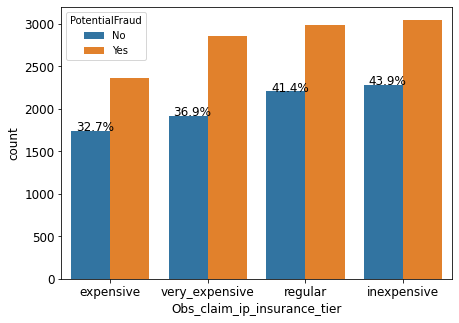

In [118]:
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_ip_Obs_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_ip_Obs['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_ip_Obs['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_ip_Obs['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_ip_Obs['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_ip_Obs['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_ip_Obs['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_ip_Obs['Obs_claim_ip_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Obs_claim_ip_insurance_tier', hue= 'PotentialFraud', data = df_train_ip_Obs)
plt.xticks(size = 12)
plt.xlabel('Obs_claim_ip_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_ip_Obs.Obs_claim_ip_insurance_tier,2,2)

In [119]:
df_train_ip_total['Obs_claim_ip_insurance_tier'] = df_train_ip_Obs['Obs_claim_ip_insurance_tier']
df_train_ip_total["Obs_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_train_ip_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,3204,60,70,Late Adulthood,True,very_expensive,None,very_expensive,None,None
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,3204,60,70,Late Adulthood,True,regular,None,regular,None,None
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,3204,60,70,Late Adulthood,True,regular,None,regular,None,None
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1068,250,320,Late Adulthood,True,None,regular,regular,None,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,2136,120,100,Late Adulthood,True,None,expensive,expensive,None,expensive


### Depression

In [120]:
# df_train_ip_Alz = df_train_ip_total[(df_train_ip_total['ChronicCond_Alzheimer'] == 1) & (df_train_ip_total['ChronicCond_Heartfailure'] == 2) & (df_train_ip_total['ChronicCond_KidneyDisease'] == 2) & (df_train_ip_total['ChronicCond_Cancer'] == 2) & (df_train_ip_total['ChronicCond_ObstrPulmonary'] == 2) & (df_train_ip_total['ChronicCond_Depression'] == 2) & (df_train_ip_total['ChronicCond_Diabetes'] == 2) & (df_train_ip_total['ChronicCond_IschemicHeart'] == 2) & (df_train_ip_total['ChronicCond_Osteoporasis'] == 2) & (df_train_ip_total['ChronicCond_rheumatoidarthritis'] == 2)& (df_train_ip_total['ChronicCond_stroke'] == 2)]
df_train_ip_Dep = df_train_ip_total[df_train_ip_total['ChronicCond_Depression'] == 1]
df_train_ip_Dep.shape

(20327, 61)

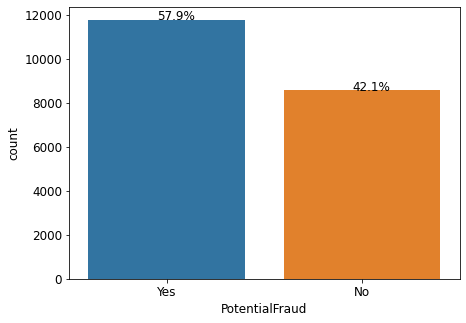

In [121]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_ip_Dep)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ip_Dep.PotentialFraud)

In [122]:
df_train_ip_Dep_not_fraud = df_train_ip_Dep[df_train_ip_Dep['PotentialFraud'] == "No"]

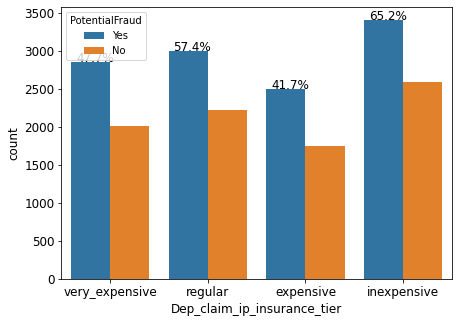

In [123]:
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_ip_Dep_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_ip_Dep['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_ip_Dep['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_ip_Dep['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_ip_Dep['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_ip_Dep['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_ip_Dep['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_ip_Dep['Dep_claim_ip_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Dep_claim_ip_insurance_tier', hue= 'PotentialFraud', data = df_train_ip_Dep)
plt.xticks(size = 12)
plt.xlabel('Dep_claim_ip_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_ip_Dep.Dep_claim_ip_insurance_tier,2,2)

In [124]:
df_train_ip_total['Dep_claim_ip_insurance_tier'] = df_train_ip_Dep['Dep_claim_ip_insurance_tier']
df_train_ip_total["Dep_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_train_ip_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier,Dep_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,60,70,Late Adulthood,True,very_expensive,None,very_expensive,None,None,very_expensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,60,70,Late Adulthood,True,regular,None,regular,None,None,regular
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,60,70,Late Adulthood,True,regular,None,regular,None,None,regular
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,250,320,Late Adulthood,True,None,regular,regular,None,None,regular
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,120,100,Late Adulthood,True,None,expensive,expensive,None,expensive,expensive


### Diabetes

In [125]:
# df_train_ip_Alz = df_train_ip_total[(df_train_ip_total['ChronicCond_Alzheimer'] == 1) & (df_train_ip_total['ChronicCond_Heartfailure'] == 2) & (df_train_ip_total['ChronicCond_KidneyDisease'] == 2) & (df_train_ip_total['ChronicCond_Cancer'] == 2) & (df_train_ip_total['ChronicCond_ObstrPulmonary'] == 2) & (df_train_ip_total['ChronicCond_Depression'] == 2) & (df_train_ip_total['ChronicCond_Diabetes'] == 2) & (df_train_ip_total['ChronicCond_IschemicHeart'] == 2) & (df_train_ip_total['ChronicCond_Osteoporasis'] == 2) & (df_train_ip_total['ChronicCond_rheumatoidarthritis'] == 2)& (df_train_ip_total['ChronicCond_stroke'] == 2)]
df_train_ip_Dia = df_train_ip_total[df_train_ip_total['ChronicCond_Diabetes'] == 1]
df_train_ip_Dia.shape

(32462, 62)

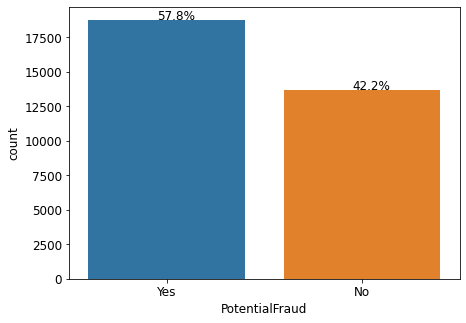

In [126]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_ip_Dia)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ip_Dia.PotentialFraud)

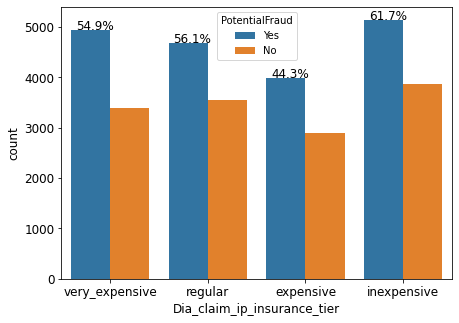

In [127]:
df_train_ip_Dia_not_fraud = df_train_ip_Dia[df_train_ip_Dia['PotentialFraud'] == "No"]

# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_ip_Dia_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_ip_Dia['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_ip_Dia['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_ip_Dia['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_ip_Dia['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_ip_Dia['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_ip_Dia['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_ip_Dia['Dia_claim_ip_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Dia_claim_ip_insurance_tier', hue= 'PotentialFraud', data = df_train_ip_Dia)
plt.xticks(size = 12)
plt.xlabel('Dia_claim_ip_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_ip_Dia.Dia_claim_ip_insurance_tier,2,2)

In [128]:
df_train_ip_total['Dia_claim_ip_insurance_tier'] = df_train_ip_Dia['Dia_claim_ip_insurance_tier']
df_train_ip_total["Dia_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_train_ip_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,OPAnnualDeductibleAmt,Age,has_claimed_ip,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier,Dep_claim_ip_insurance_tier,Dia_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,70,Late Adulthood,True,very_expensive,None,very_expensive,None,None,very_expensive,very_expensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,70,Late Adulthood,True,regular,None,regular,None,None,regular,regular
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,70,Late Adulthood,True,regular,None,regular,None,None,regular,regular
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,320,Late Adulthood,True,None,regular,regular,None,None,regular,regular
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,100,Late Adulthood,True,None,expensive,expensive,None,expensive,expensive,None


### Ischemic Heart

In [129]:
# df_train_ip_Alz = df_train_ip_total[(df_train_ip_total['ChronicCond_Alzheimer'] == 1) & (df_train_ip_total['ChronicCond_Heartfailure'] == 2) & (df_train_ip_total['ChronicCond_KidneyDisease'] == 2) & (df_train_ip_total['ChronicCond_Cancer'] == 2) & (df_train_ip_total['ChronicCond_ObstrPulmonary'] == 2) & (df_train_ip_total['ChronicCond_Depression'] == 2) & (df_train_ip_total['ChronicCond_Diabetes'] == 2) & (df_train_ip_total['ChronicCond_IschemicHeart'] == 2) & (df_train_ip_total['ChronicCond_Osteoporasis'] == 2) & (df_train_ip_total['ChronicCond_rheumatoidarthritis'] == 2)& (df_train_ip_total['ChronicCond_stroke'] == 2)]
df_train_ip_Isc = df_train_ip_total[df_train_ip_total['ChronicCond_IschemicHeart'] == 1]
df_train_ip_Isc.shape

(34674, 63)

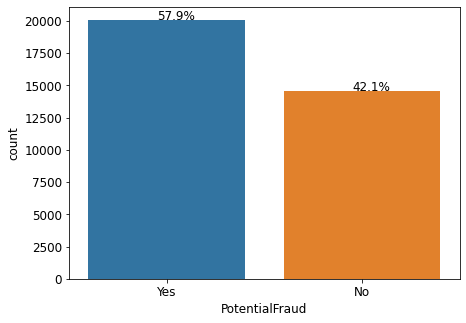

In [130]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_ip_Isc)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ip_Isc.PotentialFraud)

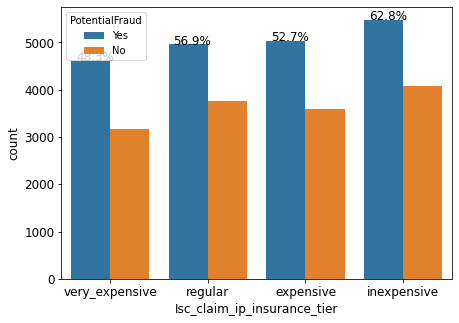

In [131]:
df_train_ip_Isc_not_fraud = df_train_ip_Isc[df_train_ip_Isc['PotentialFraud'] == "No"]
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_ip_Isc_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_ip_Isc['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_ip_Isc['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_ip_Isc['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_ip_Isc['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_ip_Isc['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_ip_Isc['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_ip_Isc['Isc_claim_ip_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Isc_claim_ip_insurance_tier', hue= 'PotentialFraud', data = df_train_ip_Isc)
plt.xticks(size = 12)
plt.xlabel('Isc_claim_ip_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_ip_Isc.Isc_claim_ip_insurance_tier,2,2)

In [132]:
df_train_ip_total['Isc_claim_ip_insurance_tier'] = df_train_ip_Isc['Isc_claim_ip_insurance_tier']
df_train_ip_total["Isc_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_train_ip_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,Age,has_claimed_ip,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier,Dep_claim_ip_insurance_tier,Dia_claim_ip_insurance_tier,Isc_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,Late Adulthood,True,very_expensive,None,very_expensive,None,None,very_expensive,very_expensive,very_expensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,Late Adulthood,True,regular,None,regular,None,None,regular,regular,regular
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,Late Adulthood,True,regular,None,regular,None,None,regular,regular,regular
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,Late Adulthood,True,None,regular,regular,None,None,regular,regular,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,Late Adulthood,True,None,expensive,expensive,None,expensive,expensive,None,expensive


### Osteoporasis

In [133]:
# df_train_ip_Alz = df_train_ip_total[(df_train_ip_total['ChronicCond_Alzheimer'] == 1) & (df_train_ip_total['ChronicCond_Heartfailure'] == 2) & (df_train_ip_total['ChronicCond_KidneyDisease'] == 2) & (df_train_ip_total['ChronicCond_Cancer'] == 2) & (df_train_ip_total['ChronicCond_ObstrPulmonary'] == 2) & (df_train_ip_total['ChronicCond_Depression'] == 2) & (df_train_ip_total['ChronicCond_Diabetes'] == 2) & (df_train_ip_total['ChronicCond_IschemicHeart'] == 2) & (df_train_ip_total['ChronicCond_Osteoporasis'] == 2) & (df_train_ip_total['ChronicCond_rheumatoidarthritis'] == 2)& (df_train_ip_total['ChronicCond_stroke'] == 2)]
df_train_ip_Ost = df_train_ip_total[df_train_ip_total['ChronicCond_Osteoporasis'] == 1]
df_train_ip_Ost.shape

(14229, 64)

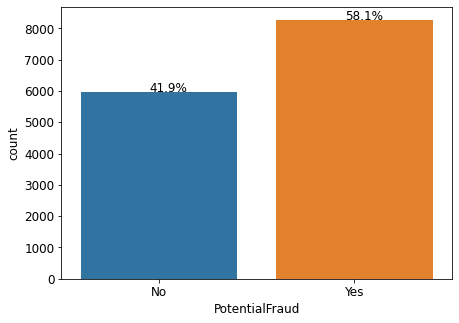

In [134]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_ip_Ost)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ip_Ost.PotentialFraud)

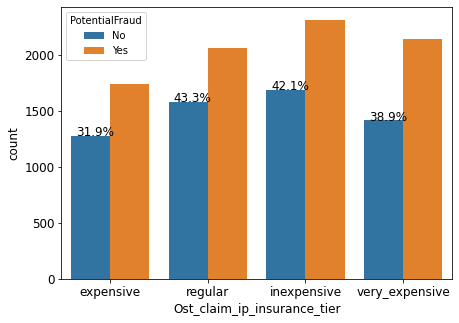

In [135]:
df_train_ip_Ost_not_fraud = df_train_ip_Ost[df_train_ip_Ost['PotentialFraud'] == "No"]
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_ip_Ost_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_ip_Ost['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_ip_Ost['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_ip_Ost['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_ip_Ost['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_ip_Ost['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_ip_Ost['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_ip_Ost['Ost_claim_ip_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Ost_claim_ip_insurance_tier', hue= 'PotentialFraud', data = df_train_ip_Ost)
plt.xticks(size = 12)
plt.xlabel('Ost_claim_ip_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_ip_Ost.Ost_claim_ip_insurance_tier,2,2)

In [136]:
df_train_ip_total['Ost_claim_ip_insurance_tier'] = df_train_ip_Ost['Ost_claim_ip_insurance_tier']
df_train_ip_total["Ost_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_train_ip_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,has_claimed_ip,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier,Dep_claim_ip_insurance_tier,Dia_claim_ip_insurance_tier,Isc_claim_ip_insurance_tier,Ost_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,True,very_expensive,None,very_expensive,None,None,very_expensive,very_expensive,very_expensive,None
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,True,regular,None,regular,None,None,regular,regular,regular,None
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,True,regular,None,regular,None,None,regular,regular,regular,None
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,True,None,regular,regular,None,None,regular,regular,None,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,True,None,expensive,expensive,None,expensive,expensive,None,expensive,None


### Rheumatoidarthritis

In [137]:
# df_train_ip_Alz = df_train_ip_total[(df_train_ip_total['ChronicCond_Alzheimer'] == 1) & (df_train_ip_total['ChronicCond_Heartfailure'] == 2) & (df_train_ip_total['ChronicCond_KidneyDisease'] == 2) & (df_train_ip_total['ChronicCond_Cancer'] == 2) & (df_train_ip_total['ChronicCond_ObstrPulmonary'] == 2) & (df_train_ip_total['ChronicCond_Depression'] == 2) & (df_train_ip_total['ChronicCond_Diabetes'] == 2) & (df_train_ip_total['ChronicCond_IschemicHeart'] == 2) & (df_train_ip_total['ChronicCond_Osteoporasis'] == 2) & (df_train_ip_total['ChronicCond_rheumatoidarthritis'] == 2)& (df_train_ip_total['ChronicCond_stroke'] == 2)]
df_train_ip_Rhe = df_train_ip_total[df_train_ip_total['ChronicCond_rheumatoidarthritis'] == 1]
df_train_ip_Rhe.shape

(14585, 65)

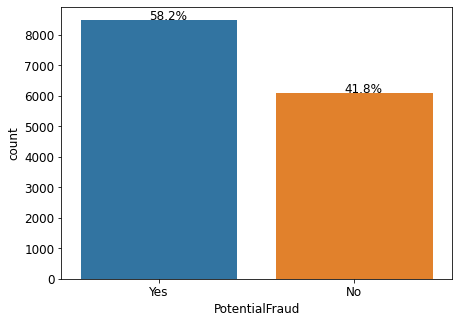

In [138]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_ip_Rhe)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ip_Rhe.PotentialFraud)

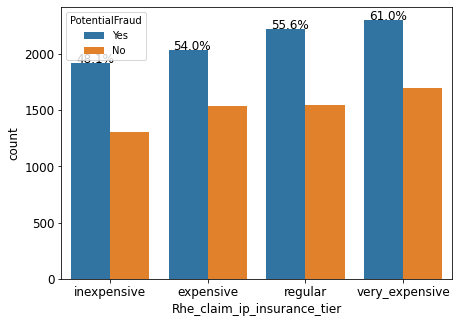

In [139]:
df_train_ip_Rhe_not_fraud = df_train_ip_Rhe[df_train_ip_Rhe['PotentialFraud'] == "No"]
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_ip_Rhe_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_ip_Rhe['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_ip_Rhe['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_ip_Rhe['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_ip_Rhe['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_ip_Rhe['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_ip_Rhe['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['very_expensive', 'expensive', 'regular', 'inexpensive']
df_train_ip_Rhe['Rhe_claim_ip_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Rhe_claim_ip_insurance_tier', hue= 'PotentialFraud', data = df_train_ip_Rhe)
plt.xticks(size = 12)
plt.xlabel('Rhe_claim_ip_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_ip_Rhe.Rhe_claim_ip_insurance_tier,2,2)

In [140]:
df_train_ip_total['Rhe_claim_ip_insurance_tier'] = df_train_ip_Rhe['Rhe_claim_ip_insurance_tier']
df_train_ip_total["Rhe_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_train_ip_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier,Dep_claim_ip_insurance_tier,Dia_claim_ip_insurance_tier,Isc_claim_ip_insurance_tier,Ost_claim_ip_insurance_tier,Rhe_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,very_expensive,None,very_expensive,None,None,very_expensive,very_expensive,very_expensive,None,inexpensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,regular,None,regular,None,None,regular,regular,regular,None,expensive
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,regular,None,regular,None,None,regular,regular,regular,None,expensive
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,None,regular,regular,None,None,regular,regular,None,None,expensive
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,None,expensive,expensive,None,expensive,expensive,None,expensive,None,None


### Stroke

In [141]:
# df_train_ip_Alz = df_train_ip_total[(df_train_ip_total['ChronicCond_Alzheimer'] == 1) & (df_train_ip_total['ChronicCond_Heartfailure'] == 2) & (df_train_ip_total['ChronicCond_KidneyDisease'] == 2) & (df_train_ip_total['ChronicCond_Cancer'] == 2) & (df_train_ip_total['ChronicCond_ObstrPulmonary'] == 2) & (df_train_ip_total['ChronicCond_Depression'] == 2) & (df_train_ip_total['ChronicCond_Diabetes'] == 2) & (df_train_ip_total['ChronicCond_IschemicHeart'] == 2) & (df_train_ip_total['ChronicCond_Osteoporasis'] == 2) & (df_train_ip_total['ChronicCond_rheumatoidarthritis'] == 2)& (df_train_ip_total['ChronicCond_stroke'] == 2)]
df_train_ip_Str = df_train_ip_total[df_train_ip_total['ChronicCond_Depression'] == 1]
df_train_ip_Str.shape

(20327, 66)

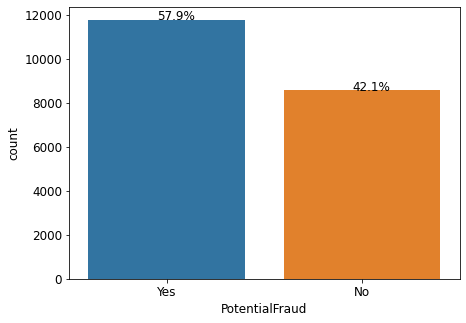

In [142]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_ip_Str)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ip_Str.PotentialFraud)

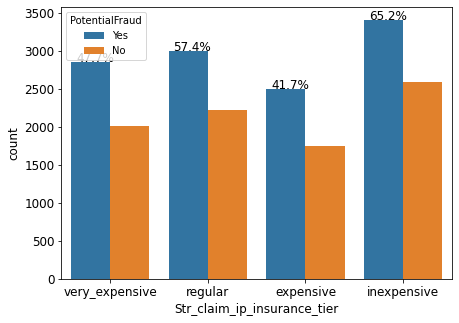

In [143]:
df_train_ip_Str_not_fraud = df_train_ip_Str[df_train_ip_Str['PotentialFraud'] == "No"]
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_ip_Str_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_ip_Str['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_ip_Str['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_ip_Str['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_ip_Str['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_ip_Str['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_ip_Str['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_ip_Str['Str_claim_ip_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Str_claim_ip_insurance_tier', hue= 'PotentialFraud', data = df_train_ip_Str)
plt.xticks(size = 12)
plt.xlabel('Str_claim_ip_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_ip_Str.Str_claim_ip_insurance_tier,2,2)

In [144]:
df_train_ip_total['Str_claim_ip_insurance_tier'] = df_train_ip_Str['Str_claim_ip_insurance_tier']
df_train_ip_total["Str_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_train_ip_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier,Dep_claim_ip_insurance_tier,Dia_claim_ip_insurance_tier,Isc_claim_ip_insurance_tier,Ost_claim_ip_insurance_tier,Rhe_claim_ip_insurance_tier,Str_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,None,very_expensive,None,None,very_expensive,very_expensive,very_expensive,None,inexpensive,very_expensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,None,regular,None,None,regular,regular,regular,None,expensive,regular
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,None,regular,None,None,regular,regular,regular,None,expensive,regular
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,regular,regular,None,None,regular,regular,None,None,expensive,regular
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,expensive,expensive,None,expensive,expensive,None,expensive,None,None,expensive


### Outpatient Data

In [145]:
df_train_op = pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv")
df_train_op.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [146]:
df_train_op.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [147]:
df_train_op.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

In [148]:
df_train_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [149]:
df_train_op.describe()

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,NaN,897.000000


In [150]:
df_train_op.shape

(517737, 27)

In [151]:
df_train_op['AttendingPhysician'] = df_train_op['AttendingPhysician'].fillna("None")
df_train_op['OperatingPhysician'] = df_train_op['OperatingPhysician'].fillna("None")
df_train_op['OtherPhysician'] = df_train_op['OtherPhysician'].fillna("None")

df_train_op=df_train_op.fillna(0)

In [152]:
df_train_op['BeneID'].nunique()

133980

**Benerficiaries Claims**

We can see several Benerficiaries have claimed several times

In [153]:
df_train_op['BeneID'].value_counts()

BENE42721     29
BENE118316    29
BENE143400    27
BENE63544     27
BENE63504     27
              ..
BENE89590      1
BENE89592      1
BENE89594      1
BENE89595      1
BENE85121      1
Name: BeneID, Length: 133980, dtype: int64

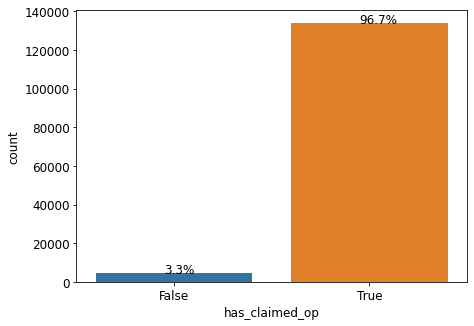

In [154]:
df_train_ben["has_claimed_op"] = df_train_ben["BeneID"].isin(df_train_op["BeneID"])

plt.figure(figsize=(7,5))
ax = sns.countplot('has_claimed_op', data = df_train_ben)
plt.xticks(size = 12)
plt.xlabel('has_claimed_op', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_ben.has_claimed_op)

About 96.7% percent of beneficiaries have admitted OP claimed

**Adding Claim Duration**

In [155]:
df_train_op['ClaimEndDt'] = pd.to_datetime(df_train_op['ClaimEndDt'], format='%Y-%m-%d')
df_train_op['ClaimStartDt'] = pd.to_datetime(df_train_op['ClaimStartDt'], format='%Y-%m-%d')

df_train_op["claim_duration"] = df_train_op['ClaimEndDt'] - df_train_op['ClaimStartDt']
df_train_op.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,claim_duration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,56409,0 days
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,79380,0 days
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0 days
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0 days
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,71947,0 days


**Merging OP data with Provider Data**

In [156]:
df_train_op_total = df_train_op.join(df_train_prov.set_index('Provider'), on='Provider')
df_train_op_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,claim_duration,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,0.0,0.0,0.0,0.0,0.0,0.0,0,56409,0 days,Yes
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,0.0,0.0,0.0,0.0,0.0,0.0,0,79380,0 days,No
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0 days,No
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0 days,Yes
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,0.0,0.0,0.0,0.0,0.0,0.0,0,71947,0 days,Yes


In [157]:
df_train_op_total.dtypes

BeneID                             object
ClaimID                            object
ClaimStartDt               datetime64[ns]
ClaimEndDt                 datetime64[ns]
Provider                           object
InscClaimAmtReimbursed              int64
AttendingPhysician                 object
OperatingPhysician                 object
OtherPhysician                     object
ClmDiagnosisCode_1                 object
ClmDiagnosisCode_2                 object
ClmDiagnosisCode_3                 object
ClmDiagnosisCode_4                 object
ClmDiagnosisCode_5                 object
ClmDiagnosisCode_6                 object
ClmDiagnosisCode_7                 object
ClmDiagnosisCode_8                 object
ClmDiagnosisCode_9                 object
ClmDiagnosisCode_10                object
ClmProcedureCode_1                float64
ClmProcedureCode_2                float64
ClmProcedureCode_3                float64
ClmProcedureCode_4                float64
ClmProcedureCode_5                

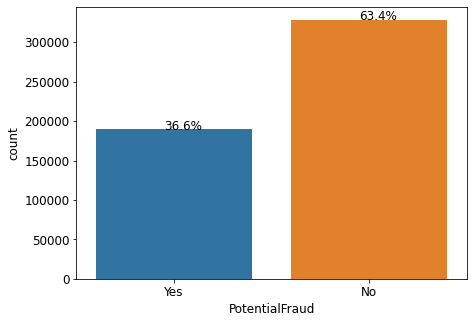

In [158]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_op_total)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_op_total.PotentialFraud)

**Adding Beneficiaries data to Claim data**

In [159]:
df_train_op_total = df_train_op_total.join(df_train_ben.set_index('BeneID'), on='BeneID')
df_train_op_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,has_claimed_op
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,2,2,2,0,0,30,50,Late Adulthood,False,True
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,2,2,2,0,0,90,40,Late Adulthood,False,True
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,2,2,2,0,0,90,40,Late Adulthood,False,True
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,1,1,2,0,0,1810,760,Late Adulthood,False,True
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,1,1,2,0,0,1810,760,Late Adulthood,False,True


## Disease

### Alzheimer

In [160]:
df_train_op_Alz = df_train_op_total[df_train_op_total['ChronicCond_Alzheimer'] == 1]
df_train_op_Alz.shape

(203926, 54)

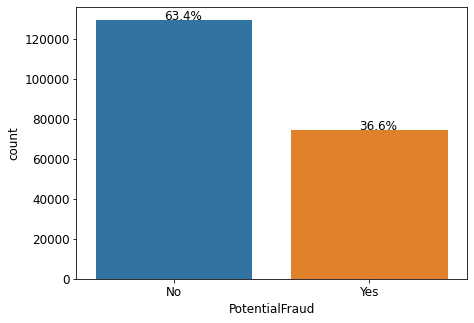

In [161]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_op_Alz)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_op_Alz.PotentialFraud)

In [162]:
df_train_op_Alz_not_fraud = df_train_op_Alz[df_train_op_Alz['PotentialFraud'] == "No"]
lower_quantile, middle_quantile,upper_quantile = df_train_op_Alz_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])
conditions = [
    (df_train_op_Alz['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_op_Alz['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_op_Alz['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_op_Alz['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_op_Alz['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_op_Alz['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_op_Alz['Alz_claim_op_insurance_tier'] = np.select(conditions, values)

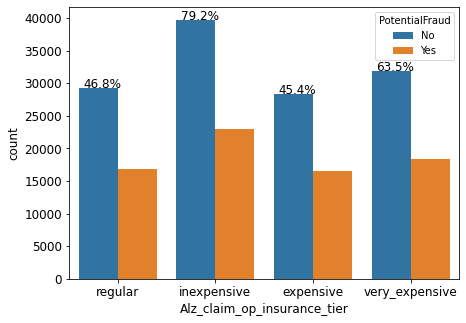

In [163]:
plt.figure(figsize=(7,5))
ax = sns.countplot('Alz_claim_op_insurance_tier', hue= 'PotentialFraud', data = df_train_op_Alz)
plt.xticks(size = 12)
plt.xlabel('Alz_claim_op_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_op_Alz.Alz_claim_op_insurance_tier,2,2)

In [164]:
df_train_op_total['Alz_claim_op_insurance_tier'] = df_train_op_Alz['Alz_claim_op_insurance_tier']
df_train_op_total["Alz_claim_op_insurance_tier"].fillna("None", inplace = True)
df_train_op_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,has_claimed_op,Alz_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,2,2,0,0,30,50,Late Adulthood,False,True,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,2,2,0,0,90,40,Late Adulthood,False,True,regular
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,2,2,0,0,90,40,Late Adulthood,False,True,inexpensive
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,1,2,0,0,1810,760,Late Adulthood,False,True,inexpensive
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,1,2,0,0,1810,760,Late Adulthood,False,True,expensive


### Heartfailure

In [165]:
df_train_op_Hf = df_train_op_total[df_train_op_total['ChronicCond_Heartfailure'] == 1]
df_train_op_Hf.shape

(300368, 55)

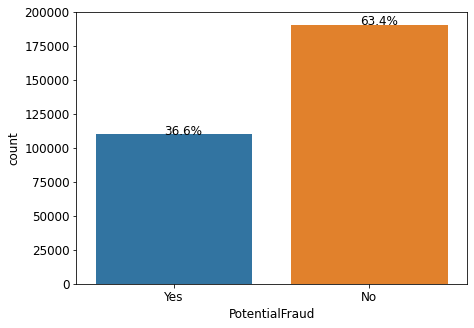

In [166]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_op_Hf)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_op_Hf.PotentialFraud)

In [167]:
df_train_op_Hf_not_fraud = df_train_op_Hf[df_train_op_Hf['PotentialFraud'] == "No"]

In [168]:
lower_quantile, middle_quantile,upper_quantile = df_train_op_Hf_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_op_Hf['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_op_Hf['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_op_Hf['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_op_Hf['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_op_Hf['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_op_Hf['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_op_Hf['Hf_claim_op_insurance_tier'] = np.select(conditions, values)

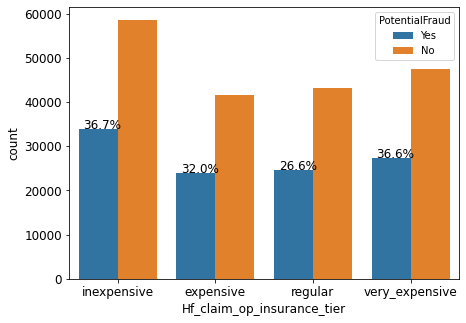

In [169]:
plt.figure(figsize=(7,5))
ax = sns.countplot('Hf_claim_op_insurance_tier', hue= 'PotentialFraud', data = df_train_op_Hf)
plt.xticks(size = 12)
plt.xlabel('Hf_claim_op_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_op_Hf.Hf_claim_op_insurance_tier,2,2)

In [170]:
df_train_op_total['Hf_claim_op_insurance_tier'] = df_train_op_Hf['Hf_claim_op_insurance_tier']
df_train_op_total["Hf_claim_op_insurance_tier"].fillna("None", inplace = True)
df_train_op_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,has_claimed_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,2,0,0,30,50,Late Adulthood,False,True,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,2,0,0,90,40,Late Adulthood,False,True,regular,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,2,0,0,90,40,Late Adulthood,False,True,inexpensive,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,2,0,0,1810,760,Late Adulthood,False,True,inexpensive,inexpensive
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,2,0,0,1810,760,Late Adulthood,False,True,expensive,expensive


### Kidney Disease

In [171]:
# df_train_ip_Alz = df_train_ip_total[(df_train_ip_total['ChronicCond_Alzheimer'] == 1) & (df_train_ip_total['ChronicCond_Heartfailure'] == 2) & (df_train_ip_total['ChronicCond_KidneyDisease'] == 2) & (df_train_ip_total['ChronicCond_Cancer'] == 2) & (df_train_ip_total['ChronicCond_ObstrPulmonary'] == 2) & (df_train_ip_total['ChronicCond_Depression'] == 2) & (df_train_ip_total['ChronicCond_Diabetes'] == 2) & (df_train_ip_total['ChronicCond_IschemicHeart'] == 2) & (df_train_ip_total['ChronicCond_Osteoporasis'] == 2) & (df_train_ip_total['ChronicCond_rheumatoidarthritis'] == 2)& (df_train_ip_total['ChronicCond_stroke'] == 2)]
df_train_op_Kd = df_train_op_total[df_train_op_total['ChronicCond_KidneyDisease'] == 1]
df_train_op_Kd.shape

(205628, 56)

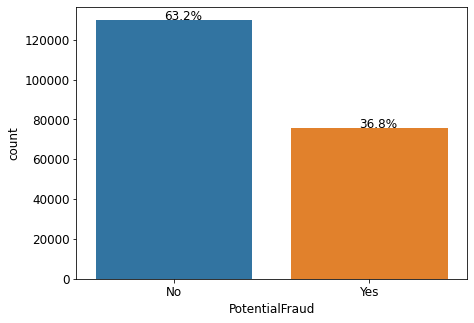

In [172]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_op_Kd)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_op_Kd.PotentialFraud)

In [173]:
df_train_op_Kd_not_fraud = df_train_op_Kd[df_train_op_Kd['PotentialFraud'] == "No"]

lower_quantile, middle_quantile,upper_quantile = df_train_op_Kd_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_op_Kd['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_op_Kd['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_op_Kd['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_op_Kd['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_op_Kd['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_op_Kd['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_op_Kd['Kd_claim_op_insurance_tier'] = np.select(conditions, values)

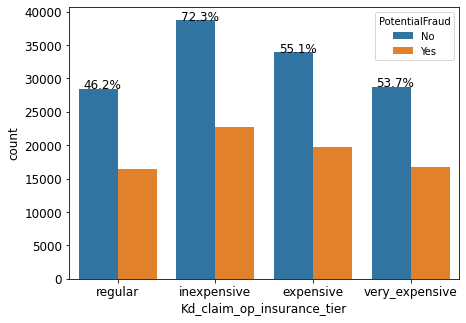

In [174]:
plt.figure(figsize=(7,5))
ax = sns.countplot('Kd_claim_op_insurance_tier', hue= 'PotentialFraud', data = df_train_op_Kd)
plt.xticks(size = 12)
plt.xlabel('Kd_claim_op_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_op_Kd.Kd_claim_op_insurance_tier,2,2)

In [175]:
df_train_op_total['Kd_claim_op_insurance_tier'] = df_train_op_Kd['Kd_claim_op_insurance_tier']
df_train_op_total["Kd_claim_op_insurance_tier"].fillna("None", inplace = True)
df_train_op_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,has_claimed_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,0,0,30,50,Late Adulthood,False,True,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,0,0,90,40,Late Adulthood,False,True,regular,None,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,0,0,90,40,Late Adulthood,False,True,inexpensive,None,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,0,0,1810,760,Late Adulthood,False,True,inexpensive,inexpensive,None
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,0,0,1810,760,Late Adulthood,False,True,expensive,expensive,None


### Cancer

In [176]:
df_train_op_Ca = df_train_op_total[df_train_op_total['ChronicCond_Cancer'] == 1]
df_train_op_Ca.shape

(76776, 57)

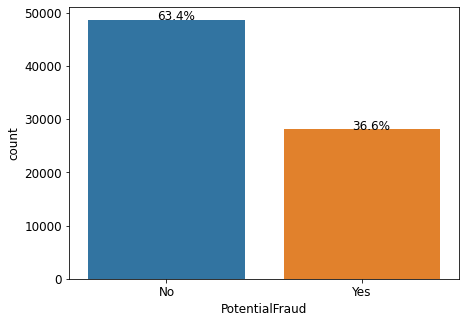

In [177]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_op_Ca)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_op_Ca.PotentialFraud)

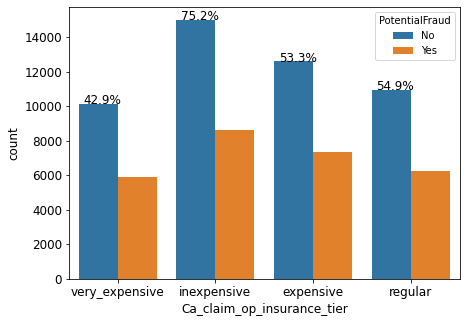

In [178]:
df_train_op_Ca_not_fraud = df_train_op_Ca[df_train_op_Ca['PotentialFraud'] == "No"]

# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_op_Ca_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_op_Ca['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_op_Ca['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_op_Ca['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_op_Ca['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_op_Ca['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_op_Ca['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_op_Ca['Ca_claim_op_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Ca_claim_op_insurance_tier', hue= 'PotentialFraud', data = df_train_op_Ca)
plt.xticks(size = 12)
plt.xlabel('Ca_claim_op_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_op_Ca.Ca_claim_op_insurance_tier,2,2)

In [179]:
df_train_op_total['Ca_claim_op_insurance_tier'] = df_train_op_Ca['Ca_claim_op_insurance_tier']
df_train_op_total["Ca_claim_op_insurance_tier"].fillna("None", inplace = True)
df_train_op_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,has_claimed_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,0,30,50,Late Adulthood,False,True,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,0,90,40,Late Adulthood,False,True,regular,None,None,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,0,90,40,Late Adulthood,False,True,inexpensive,None,None,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,0,1810,760,Late Adulthood,False,True,inexpensive,inexpensive,None,None
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,0,1810,760,Late Adulthood,False,True,expensive,expensive,None,None


### ObstrPulmonary

In [180]:
df_train_op_Obs = df_train_op_total[df_train_op_total['ChronicCond_ObstrPulmonary'] == 1]
df_train_op_Obs.shape

(155288, 58)

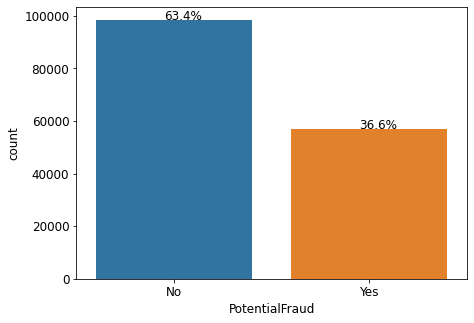

In [181]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_op_Obs)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_op_Obs.PotentialFraud)

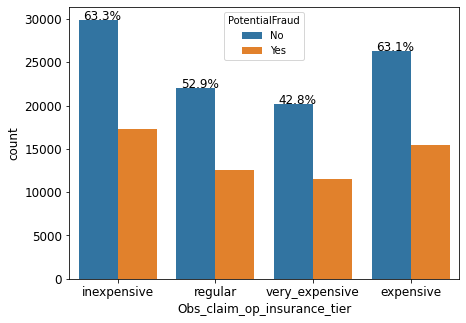

In [182]:
df_train_op_Obs_not_fraud = df_train_op_Obs[df_train_op_Obs['PotentialFraud'] == "No"]

# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_op_Obs_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_op_Obs['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_op_Obs['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_op_Obs['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_op_Obs['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_op_Obs['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_op_Obs['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_op_Obs['Obs_claim_op_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Obs_claim_op_insurance_tier', hue= 'PotentialFraud', data = df_train_op_Obs)
plt.xticks(size = 12)
plt.xlabel('Obs_claim_op_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_op_Obs.Obs_claim_op_insurance_tier,2,2)

In [183]:
df_train_op_total['Obs_claim_op_insurance_tier'] = df_train_op_Obs['Obs_claim_op_insurance_tier']
df_train_op_total["Obs_claim_op_insurance_tier"].fillna("None", inplace = True)
df_train_op_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,has_claimed_ip,has_claimed_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,30,50,Late Adulthood,False,True,None,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,90,40,Late Adulthood,False,True,regular,None,None,None,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,90,40,Late Adulthood,False,True,inexpensive,None,None,None,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,1810,760,Late Adulthood,False,True,inexpensive,inexpensive,None,None,None
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,1810,760,Late Adulthood,False,True,expensive,expensive,None,None,None


### Depression

In [184]:
df_train_op_Dep = df_train_op_total[df_train_op_total['ChronicCond_Depression'] == 1]
df_train_op_Dep.shape

(222387, 59)

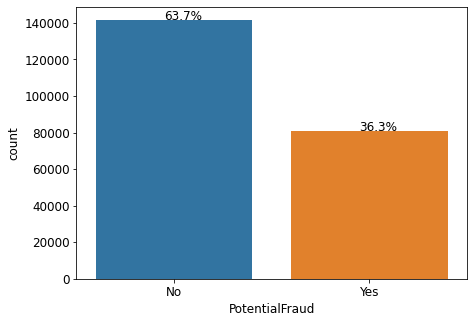

In [185]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_op_Dep)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_op_Dep.PotentialFraud)

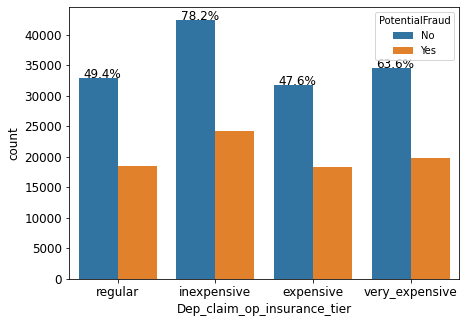

In [186]:
df_train_op_Dep_not_fraud = df_train_op_Dep[df_train_op_Dep['PotentialFraud'] == "No"]

# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_op_Dep_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_op_Dep['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_op_Dep['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_op_Dep['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_op_Dep['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_op_Dep['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_op_Dep['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_op_Dep['Dep_claim_op_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Dep_claim_op_insurance_tier', hue= 'PotentialFraud', data = df_train_op_Dep)
plt.xticks(size = 12)
plt.xlabel('Dep_claim_op_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_op_Dep.Dep_claim_op_insurance_tier,2,2)

In [187]:
df_train_op_total['Dep_claim_op_insurance_tier'] = df_train_op_Dep['Dep_claim_op_insurance_tier']
df_train_op_total["Dep_claim_op_insurance_tier"].fillna("None", inplace = True)
df_train_op_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,OPAnnualDeductibleAmt,Age,has_claimed_ip,has_claimed_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,50,Late Adulthood,False,True,None,None,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,40,Late Adulthood,False,True,regular,None,None,None,None,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,40,Late Adulthood,False,True,inexpensive,None,None,None,None,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,760,Late Adulthood,False,True,inexpensive,inexpensive,None,None,None,None
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,760,Late Adulthood,False,True,expensive,expensive,None,None,None,None


### Diabetes

In [188]:
df_train_op_Dia = df_train_op_total[df_train_op_total['ChronicCond_Diabetes'] == 1]
df_train_op_Dia.shape

(361297, 60)

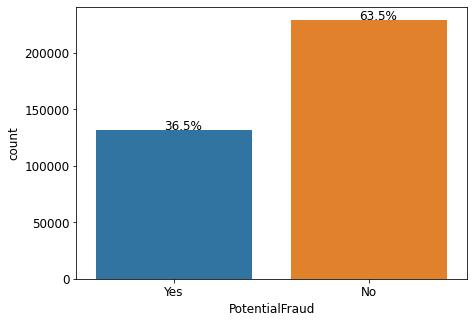

In [189]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_op_Dia)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_op_Dia.PotentialFraud)

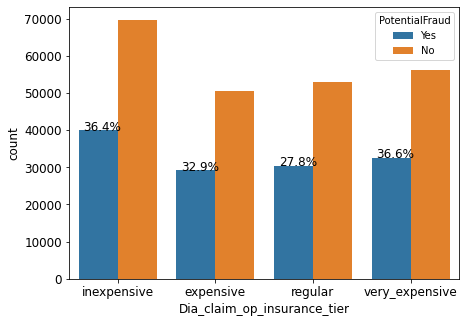

In [190]:
df_train_op_Dia_not_fraud = df_train_op_Dia[df_train_op_Dia['PotentialFraud'] == "No"]

# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_op_Dia_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_op_Dia['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_op_Dia['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_op_Dia['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_op_Dia['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_op_Dia['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_op_Dia['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_op_Dia['Dia_claim_op_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Dia_claim_op_insurance_tier', hue= 'PotentialFraud', data = df_train_op_Dia)
plt.xticks(size = 12)
plt.xlabel('Dia_claim_op_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_op_Dia.Dia_claim_op_insurance_tier,2,2)

In [191]:
df_train_op_total['Dia_claim_op_insurance_tier'] = df_train_op_Dia['Dia_claim_op_insurance_tier']
df_train_op_total["Dia_claim_op_insurance_tier"].fillna("None", inplace = True)
df_train_op_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,Age,has_claimed_ip,has_claimed_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,Late Adulthood,False,True,None,None,None,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,Late Adulthood,False,True,regular,None,None,None,None,None,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,Late Adulthood,False,True,inexpensive,None,None,None,None,None,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,Late Adulthood,False,True,inexpensive,inexpensive,None,None,None,None,inexpensive
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,Late Adulthood,False,True,expensive,expensive,None,None,None,None,expensive


### IschemicHeart

In [192]:
df_train_op_Isc = df_train_op_total[df_train_op_total['ChronicCond_IschemicHeart'] == 1]
df_train_op_Isc.shape

(389156, 61)

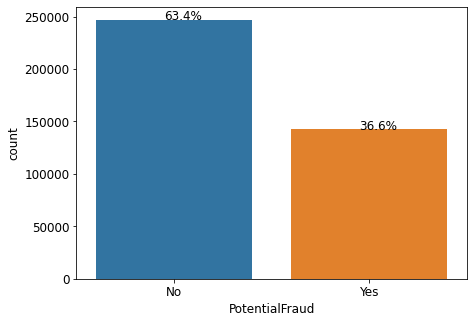

In [193]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_op_Isc)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_op_Isc.PotentialFraud)

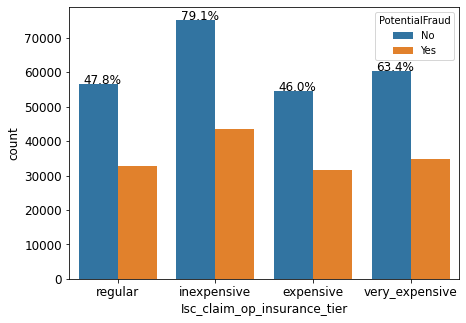

In [194]:
df_train_op_Isc_not_fraud = df_train_op_Isc[df_train_op_Isc['PotentialFraud'] == "No"]
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_op_Isc_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_op_Isc['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_op_Isc['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_op_Isc['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_op_Isc['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_op_Isc['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_op_Isc['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_op_Isc['Isc_claim_op_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Isc_claim_op_insurance_tier', hue= 'PotentialFraud', data = df_train_op_Isc)
plt.xticks(size = 12)
plt.xlabel('Isc_claim_op_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_op_Isc.Isc_claim_op_insurance_tier,2,2)

In [195]:
df_train_op_total['Isc_claim_op_insurance_tier'] = df_train_op_Isc['Isc_claim_op_insurance_tier']
df_train_op_total["Isc_claim_op_insurance_tier"].fillna("None", inplace = True)
df_train_op_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,has_claimed_ip,has_claimed_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,False,True,None,None,None,None,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,False,True,regular,None,None,None,None,None,None,regular
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,False,True,inexpensive,None,None,None,None,None,None,inexpensive
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,False,True,inexpensive,inexpensive,None,None,None,None,inexpensive,inexpensive
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,False,True,expensive,expensive,None,None,None,None,expensive,expensive


### Osteoporasis

In [196]:
df_train_op_Ost = df_train_op_total[df_train_op_total['ChronicCond_Osteoporasis'] == 1]
df_train_op_Ost.shape

(163085, 62)

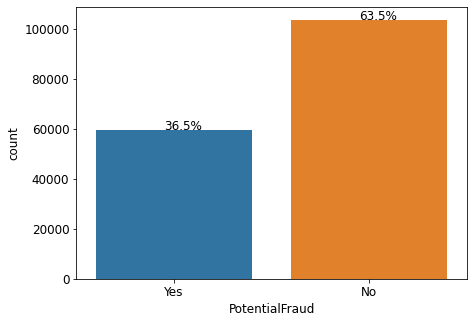

In [197]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_op_Ost)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_op_Ost.PotentialFraud)

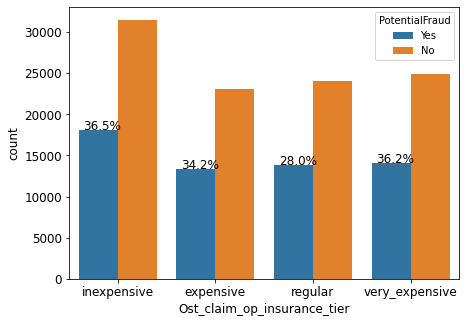

In [198]:
df_train_op_Ost_not_fraud = df_train_op_Ost[df_train_op_Ost['PotentialFraud'] == "No"]
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_op_Ost_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_op_Ost['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_op_Ost['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_op_Ost['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_op_Ost['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_op_Ost['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_op_Ost['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_op_Ost['Ost_claim_op_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Ost_claim_op_insurance_tier', hue= 'PotentialFraud', data = df_train_op_Ost)
plt.xticks(size = 12)
plt.xlabel('Ost_claim_op_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_op_Ost.Ost_claim_op_insurance_tier,2,2)

In [199]:
df_train_op_total['Ost_claim_op_insurance_tier'] = df_train_op_Ost['Ost_claim_op_insurance_tier']
df_train_op_total["Ost_claim_op_insurance_tier"].fillna("None", inplace = True)
df_train_op_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,has_claimed_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,True,None,None,None,None,None,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,True,regular,None,None,None,None,None,None,regular,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,True,inexpensive,None,None,None,None,None,None,inexpensive,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,True,inexpensive,inexpensive,None,None,None,None,inexpensive,inexpensive,inexpensive
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,True,expensive,expensive,None,None,None,None,expensive,expensive,expensive


### Rheumatoidarthritis

In [200]:
df_train_op_Rhe = df_train_op_total[df_train_op_total['ChronicCond_rheumatoidarthritis'] == 1]
df_train_op_Rhe.shape

(159114, 63)

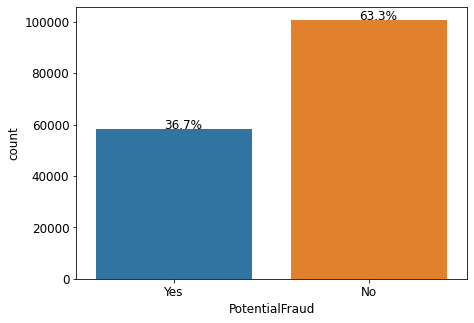

In [201]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_op_Rhe)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_op_Rhe.PotentialFraud)

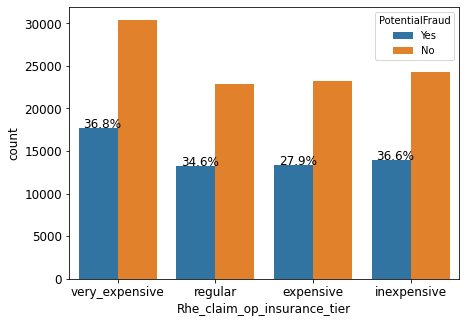

In [202]:
df_train_op_Rhe_not_fraud = df_train_op_Rhe[df_train_op_Rhe['PotentialFraud'] == "No"]
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_op_Rhe_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_op_Rhe['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_op_Rhe['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_op_Rhe['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_op_Rhe['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_op_Rhe['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_op_Rhe['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['very_expensive', 'expensive', 'regular', 'inexpensive']
df_train_op_Rhe['Rhe_claim_op_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Rhe_claim_op_insurance_tier', hue= 'PotentialFraud', data = df_train_op_Rhe)
plt.xticks(size = 12)
plt.xlabel('Rhe_claim_op_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_op_Rhe.Rhe_claim_op_insurance_tier,2,2)

In [203]:
df_train_op_total['Rhe_claim_op_insurance_tier'] = df_train_op_Rhe['Rhe_claim_op_insurance_tier']
df_train_op_total["Rhe_claim_op_insurance_tier"].fillna("None", inplace = True)
df_train_op_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,None,None,None,None,None,None,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,regular,None,None,None,None,None,None,regular,None,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,inexpensive,None,None,None,None,None,None,inexpensive,None,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,inexpensive,inexpensive,None,None,None,None,inexpensive,inexpensive,inexpensive,very_expensive
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,expensive,expensive,None,None,None,None,expensive,expensive,expensive,regular


### Stroke

In [204]:
df_train_op_Str = df_train_op_total[df_train_op_total['ChronicCond_Depression'] == 1]
df_train_op_Str.shape

(222387, 64)

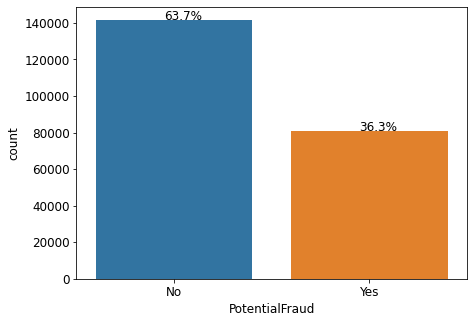

In [205]:
plt.figure(figsize=(7,5))
ax = sns.countplot('PotentialFraud', data = df_train_op_Str)
plt.xticks(size = 12)
plt.xlabel('PotentialFraud', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
without_hue(ax,df_train_op_Str.PotentialFraud)

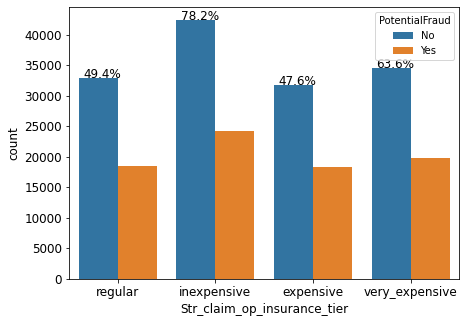

In [206]:
df_train_op_Str_not_fraud = df_train_op_Str[df_train_op_Str['PotentialFraud'] == "No"]
# average_insurance_claim = df_train_ip_Alz_not_fraud[df_train_ip_Alz_not_fraud.InscClaimAmtReimbursed != 0].InscClaimAmtReimbursed.mean()
lower_quantile, middle_quantile,upper_quantile = df_train_op_Str_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_op_Str['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_train_op_Str['InscClaimAmtReimbursed'] > lower_quantile) & (df_train_op_Str['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_train_op_Str['InscClaimAmtReimbursed'] > middle_quantile) & (df_train_op_Str['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_train_op_Str['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_train_op_Str['Str_claim_op_insurance_tier'] = np.select(conditions, values)

plt.figure(figsize=(7,5))
ax = sns.countplot('Str_claim_op_insurance_tier', hue= 'PotentialFraud', data = df_train_op_Str)
plt.xticks(size = 12)
plt.xlabel('Str_claim_op_insurance_tier', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, df_train_op_Str.Str_claim_op_insurance_tier,2,2)

In [207]:
df_train_op_total['Str_claim_op_insurance_tier'] = df_train_op_Str['Str_claim_op_insurance_tier']
df_train_op_total["Str_claim_op_insurance_tier"].fillna("None", inplace = True)
df_train_op_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,None,None,None,None,None,None,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,None,None,None,None,None,None,regular,None,None,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,None,None,None,None,None,None,inexpensive,None,None,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,inexpensive,None,None,None,None,inexpensive,inexpensive,inexpensive,very_expensive,None
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,expensive,None,None,None,None,expensive,expensive,expensive,regular,None


# Concat Two Dataframe

In [208]:
# df_train_total=df_train_total.drop('AdmissionDt')
frames = [df_train_ip_total, df_train_op_total]
df_train_total = pd.concat(frames)
df_train_total = df_train_total.drop('AdmissionDt', axis=1)
df_train_total = df_train_total.fillna("None")
df_train_total_cpy = df_train_total.copy()

In [209]:
df_train_total_cpy.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,7866,...,None,None,None,None,None,None,None,None,None,None
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,6186,...,None,None,None,None,None,None,None,None,None,None
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,29590,...,None,None,None,None,None,None,None,None,None,None
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,None,None,None,None,None,None,None,None,None,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,78321,...,None,None,None,None,None,None,None,None,None,None


# Check Repetitions between Fraud Providers with the AttendingPhysician

In [210]:
df_train_total_fraud = df_train_total[df_train_total['PotentialFraud'] == "Yes"]

In [211]:
df_train_total_fraud['AttendingPhysician'].replace(to_replace=["None"], value=np.nan, inplace=True)

In [212]:
df_train_total_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,7866,...,None,None,None,None,None,None,None,None,None,None
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,1749,...,None,None,None,None,None,None,None,None,None,None
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,None,78605,...,None,None,None,None,None,None,None,None,None,None
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,None,41401,...,None,None,None,None,None,None,None,None,None,None
10,BENE11034,CLM57949,2009-07-01,2009-07-09,PRV55193,102000,PHY397979,PHY418257,None,78605,...,None,None,None,None,None,None,None,None,None,None


In [213]:
df_train_total_fraud= df_train_total_fraud.groupby(['AttendingPhysician', 'Provider']).size().reset_index(name='counts')

In [214]:
df_train_total_fraud.counts

0         1
1         2
2        17
3         1
4         1
         ..
20799     1
20800     9
20801     3
20802     1
20803     3
Name: counts, Length: 20804, dtype: int64

In [215]:
df_train_total_fraud.head()

,AttendingPhysician,Provider,counts
0,PHY311002,PRV57495,1
1,PHY311008,PRV51868,2
2,PHY311011,PRV55689,17
3,PHY311017,PRV52045,1
4,PHY311021,PRV56259,1


In [216]:
lower_quantile, middle_quantile,upper_quantile = df_train_total_fraud.counts.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_total_fraud['counts'] <= lower_quantile),
    (df_train_total_fraud['counts'] > lower_quantile) & (df_train_total_fraud['counts'] <= middle_quantile),
    (df_train_total_fraud['counts'] > middle_quantile) & (df_train_total_fraud['counts'] <= upper_quantile),
    (df_train_total_fraud['counts'] > upper_quantile)
    ]

values = ['normal','suspicious','very_suspicious' ,'most_probably_fraud']
df_train_total_fraud['Physician_Potential_Fraud'] = np.select(conditions, values)

In [217]:
df_train_total_fraud

,AttendingPhysician,Provider,counts,Physician_Potential_Fraud
0,PHY311002,PRV57495,1,normal
1,PHY311008,PRV51868,2,suspicious
2,PHY311011,PRV55689,17,most_probably_fraud
3,PHY311017,PRV52045,1,normal
4,PHY311021,PRV56259,1,normal
...,...,...,...,...
20799,PHY434128,PRV51149,1,normal
20800,PHY434140,PRV54739,9,most_probably_fraud
20801,PHY434142,PRV54566,3,very_suspicious
20802,PHY434153,PRV51951,1,normal


In [218]:
df_train_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,7866,...,None,None,None,None,None,None,None,None,None,None
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,6186,...,None,None,None,None,None,None,None,None,None,None
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,29590,...,None,None,None,None,None,None,None,None,None,None
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,None,None,None,None,None,None,None,None,None,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,78321,...,None,None,None,None,None,None,None,None,None,None


In [219]:
df_train_total_cpy['Physician_Potential_Fraud'] = df_train_total_fraud['Physician_Potential_Fraud']
df_train_total_cpy["Physician_Potential_Fraud"].fillna("None", inplace = True)
df_train_total_cpy.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,7866,...,None,None,None,None,None,None,None,None,None,normal
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,6186,...,None,None,None,None,None,None,None,None,None,suspicious
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,29590,...,None,None,None,None,None,None,None,None,None,most_probably_fraud
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,None,None,None,None,None,None,None,None,None,normal
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,78321,...,None,None,None,None,None,None,None,None,None,normal


# Beneficiaries with concerning level of reimbursement

## IPAnnualReimbursementAmt

In [220]:
max_Ip_annual_reimbursement = df_train_total_cpy[df_train_total_cpy.IPAnnualReimbursementAmt == df_train_total_cpy.IPAnnualReimbursementAmt.max()]

In [221]:
max_Ip_annual_reimbursement

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud
39514,BENE155688,CLM44467,2009-03-28,2009-04-03,PRV53461,125000,PHY332723,PHY332723,None,4280,...,None,None,None,None,None,None,None,None,None,None
39515,BENE155688,CLM64374,2009-08-18,2009-08-19,PRV53401,34000,PHY361076,PHY420479,None,72283,...,None,None,None,None,None,None,None,None,None,None
505756,BENE155688,CLM82010,2009-03-29,2009-04-02,PRV53461,101250,PHY332723,PHY332723,None,4280,...,very_expensive,None,None,None,very_expensive,very_expensive,None,None,None,None


In [222]:
max_Ip_annual_reimbursement['PotentialFraud']

39514     Yes
39515     Yes
505756    Yes
Name: PotentialFraud, dtype: object

In [223]:
df_bene_fraud = df_train_total_cpy[df_train_total_cpy.BeneID == 'BENE155688']
df_bene_fraud

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud
39514,BENE155688,CLM44467,2009-03-28,2009-04-03,PRV53461,125000,PHY332723,PHY332723,None,4280,...,None,None,None,None,None,None,None,None,None,None
39515,BENE155688,CLM64374,2009-08-18,2009-08-19,PRV53401,34000,PHY361076,PHY420479,None,72283,...,None,None,None,None,None,None,None,None,None,None
505756,BENE155688,CLM82010,2009-03-29,2009-04-02,PRV53461,101250,PHY332723,PHY332723,None,4280,...,very_expensive,None,None,None,very_expensive,very_expensive,None,None,None,None


## OPAnnualReimbursementAmt

In [224]:
max_Op_annual_reimbursement = df_train_total_cpy[df_train_total_cpy.OPAnnualReimbursementAmt == df_train_total_cpy.OPAnnualReimbursementAmt.max()]
max_Ip_annual_reimbursement

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud
39514,BENE155688,CLM44467,2009-03-28,2009-04-03,PRV53461,125000,PHY332723,PHY332723,None,4280,...,None,None,None,None,None,None,None,None,None,None
39515,BENE155688,CLM64374,2009-08-18,2009-08-19,PRV53401,34000,PHY361076,PHY420479,None,72283,...,None,None,None,None,None,None,None,None,None,None
505756,BENE155688,CLM82010,2009-03-29,2009-04-02,PRV53461,101250,PHY332723,PHY332723,None,4280,...,very_expensive,None,None,None,very_expensive,very_expensive,None,None,None,None


There is no cooling-off period (https://www.hdfcergo.com/blogs/health-insurance/what-is-cooling-off-period-in-health-insurance)

# Check Repetitions between Fraud Providers with the OperatingPhysician

In [225]:
df_train_total_fraud = df_train_total_cpy[df_train_total_cpy['PotentialFraud'] == "Yes"]
df_train_total_fraud['OperatingPhysician'].replace(to_replace=["None"], value=np.nan, inplace=True)
df_train_total_fraud= df_train_total_fraud.groupby(['OperatingPhysician', 'Provider']).size().reset_index(name='counts')

In [226]:
df_train_total_fraud.head()

,OperatingPhysician,Provider,counts
0,PHY311011,PRV55689,5
1,PHY311041,PRV55215,2
2,PHY311051,PRV55027,1
3,PHY311058,PRV52347,2
4,PHY311081,PRV55230,1


In [227]:
df_train_total_fraud.counts

0        5
1        2
2        1
3        2
4        1
        ..
9754     4
9755     6
9756     1
9757    10
9758     1
Name: counts, Length: 9759, dtype: int64

In [228]:
lower_quantile, middle_quantile,upper_quantile = df_train_total_fraud.counts.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_total_fraud['counts'] <= lower_quantile),
    (df_train_total_fraud['counts'] > lower_quantile) & (df_train_total_fraud['counts'] <= middle_quantile),
    (df_train_total_fraud['counts'] > middle_quantile) & (df_train_total_fraud['counts'] <= upper_quantile),
    (df_train_total_fraud['counts'] > upper_quantile)
    ]

values = ['normal','suspicious','very_suspicious' ,'most_probably_fraud']
df_train_total_fraud['Operating_Physician_Potential_Fraud'] = np.select(conditions, values)

In [229]:
df_train_total_cpy['Operating_Physician_Potential_Fraud'] = df_train_total_fraud['Operating_Physician_Potential_Fraud']
df_train_total_cpy["Operating_Physician_Potential_Fraud"].fillna("None", inplace = True)
df_train_total_cpy.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud,Operating_Physician_Potential_Fraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,7866,...,None,None,None,None,None,None,None,None,normal,most_probably_fraud
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,6186,...,None,None,None,None,None,None,None,None,suspicious,very_suspicious
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,29590,...,None,None,None,None,None,None,None,None,most_probably_fraud,normal
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,None,None,None,None,None,None,None,None,normal,very_suspicious
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,78321,...,None,None,None,None,None,None,None,None,normal,normal


# Check Repetitions between Fraud Providers with the OtherPhysician

In [230]:
df_train_total_fraud = df_train_total_cpy[df_train_total_cpy['PotentialFraud'] == "Yes"]
df_train_total_fraud['OtherPhysician'].replace(to_replace=["None"], value=np.nan, inplace=True)
df_train_total_fraud= df_train_total_fraud.groupby(['OtherPhysician', 'Provider']).size().reset_index(name='counts')

In [231]:
df_train_total_fraud.counts

0         2
1         1
2         1
3         1
4        10
         ..
11403     1
11404     5
11405     1
11406     1
11407     1
Name: counts, Length: 11408, dtype: int64

In [232]:
lower_quantile, middle_quantile,upper_quantile = df_train_total_fraud.counts.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_total_fraud['counts'] <= lower_quantile),
    (df_train_total_fraud['counts'] > lower_quantile) & (df_train_total_fraud['counts'] <= middle_quantile),
    (df_train_total_fraud['counts'] > middle_quantile) & (df_train_total_fraud['counts'] <= upper_quantile),
    (df_train_total_fraud['counts'] > upper_quantile)
    ]

values = ['normal','suspicious','very_suspicious' ,'most_probably_fraud']
df_train_total_fraud['Other_Physician_Potential_Fraud'] = np.select(conditions, values)

In [233]:
df_train_total_cpy['Other_Physician_Potential_Fraud'] = df_train_total_fraud['Other_Physician_Potential_Fraud']
df_train_total_cpy["Other_Physician_Potential_Fraud"].fillna("None", inplace = True)
df_train_total_cpy.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud,Operating_Physician_Potential_Fraud,Other_Physician_Potential_Fraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,7866,...,None,None,None,None,None,None,None,normal,most_probably_fraud,very_suspicious
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,6186,...,None,None,None,None,None,None,None,suspicious,very_suspicious,normal
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,29590,...,None,None,None,None,None,None,None,most_probably_fraud,normal,normal
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,None,None,None,None,None,None,None,normal,very_suspicious,normal
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,78321,...,None,None,None,None,None,None,None,normal,normal,most_probably_fraud


# Check Repetitions between Fraud Providers with the Beneficiaries

In [234]:
df_train_total_fraud = df_train_total_cpy[df_train_total_cpy['PotentialFraud'] == "Yes"]
df_train_total_fraud= df_train_total_fraud.groupby(['BeneID', 'Provider']).size().reset_index(name='counts')

In [235]:
df_train_total_fraud.counts

0         2
1         4
2         1
3         1
4         1
         ..
122458    1
122459    1
122460    1
122461    2
122462    1
Name: counts, Length: 122463, dtype: int64

In [236]:
lower_quantile, middle_quantile,upper_quantile = df_train_total_fraud.counts.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_total_fraud['counts'] <= lower_quantile),
    (df_train_total_fraud['counts'] > lower_quantile) & (df_train_total_fraud['counts'] <= middle_quantile),
    (df_train_total_fraud['counts'] > middle_quantile) & (df_train_total_fraud['counts'] <= upper_quantile),
    (df_train_total_fraud['counts'] > upper_quantile)
    ]

values = ['normal','suspicious','very_suspicious' ,'most_probably_fraud']
df_train_total_fraud['Beneficiaries_Potential_Fraud'] = np.select(conditions, values)

In [237]:
df_train_total_cpy['Beneficiaries_Potential_Fraud'] = df_train_total_fraud['Beneficiaries_Potential_Fraud']
df_train_total_cpy["Beneficiaries_Potential_Fraud"].fillna("None", inplace = True)
df_train_total_cpy.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud,Operating_Physician_Potential_Fraud,Other_Physician_Potential_Fraud,Beneficiaries_Potential_Fraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,7866,...,None,None,None,None,None,None,normal,most_probably_fraud,very_suspicious,very_suspicious
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,6186,...,None,None,None,None,None,None,suspicious,very_suspicious,normal,most_probably_fraud
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,29590,...,None,None,None,None,None,None,most_probably_fraud,normal,normal,normal
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,None,None,None,None,None,None,normal,very_suspicious,normal,normal
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,78321,...,None,None,None,None,None,None,normal,normal,most_probably_fraud,normal


In [238]:
df_train_total_cpy.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'claim_duration', 'PotentialFraud', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond

In [239]:
df_train_total = df_train_total_cpy

# Data Preprocessing

In [240]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score,  confusion_matrix,classification_report
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Age','Alz_claim_ip_insurance_tier',
       'Hf_claim_ip_insurance_tier', 'Kd_claim_insurance_tier',
       'Ca_claim_ip_insurance_tier', 'Obs_claim_ip_insurance_tier',
       'Dep_claim_ip_insurance_tier', 'Dia_claim_ip_insurance_tier',
       'Isc_claim_ip_insurance_tier', 'Ost_claim_ip_insurance_tier',
       'Rhe_claim_ip_insurance_tier', 'Str_claim_ip_insurance_tier',
       'Alz_claim_op_insurance_tier',
       'Hf_claim_op_insurance_tier', 'Kd_claim_op_insurance_tier',
       'Ca_claim_op_insurance_tier', 'Obs_claim_op_insurance_tier',
       'Dep_claim_op_insurance_tier', 'Dia_claim_op_insurance_tier',
       'Isc_claim_op_insurance_tier', 'Ost_claim_op_insurance_tier',
       'Rhe_claim_op_insurance_tier', 'Str_claim_op_insurance_tier',
       'Physician_Potential_Fraud', 'Operating_Physician_Potential_Fraud',
       'Other_Physician_Potential_Fraud', 'Beneficiaries_Potential_Fraud','PotentialFraud']

In [241]:
le = LabelEncoder()
df_train_total[categorical_cols] = df_train_total[categorical_cols].apply(lambda col: le.fit_transform(col))
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_train_total = df_train_total.select_dtypes(include=numerics)

In [242]:
df_train_total['PotentialFraud']

0         1
1         0
2         0
3         0
4         0
         ..
517732    0
517733    0
517734    0
517735    0
517736    0
Name: PotentialFraud, Length: 558211, dtype: int64

In [243]:
# X = df_train_total.drop(['BeneID','ClaimID','ClaimStartDt','ClaimEndDt','Provider','InscClaimAmtReimbursed','AttendingPhysician','OperatingPhysician','OtherPhysician','DOD','DOB','PotentialFraud'],axis=1)
X = df_train_total.drop(['PotentialFraud'],axis=1)
y = df_train_total['PotentialFraud']

X.head()

,InscClaimAmtReimbursed,Gender,Race,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud,Operating_Physician_Potential_Fraud,Other_Physician_Potential_Fraud,Beneficiaries_Potential_Fraud
0,26000,1,1,39,230,1,2,1,2,2,...,0,0,0,0,0,0,2,1,3,3
1,5000,1,1,39,230,1,2,1,2,2,...,0,0,0,0,0,0,3,3,2,1
2,5000,1,1,39,230,1,2,1,2,2,...,0,0,0,0,0,0,1,2,2,2
3,5000,2,2,1,360,2,1,1,2,2,...,0,0,0,0,0,0,2,3,2,2
4,10000,2,1,45,780,2,1,1,2,1,...,0,0,0,0,0,0,2,2,1,2


In [244]:
X.shape

(558211, 47)

In [245]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_true = train_test_split(X, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [246]:
import itertools
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix', cmap=plt.cm.Reds):

     plt.imshow(cm, interpolation='nearest', cmap=cmap)
     plt.title(title)
     plt.colorbar()
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)
     
     thresh = cm.max() / 2.
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

     plt.tight_layout()
     plt.ylabel('Predicted label')
     plt.xlabel('Actual label')


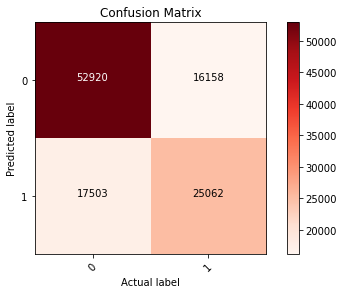

In [247]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc_score_dt = accuracy_score(y_true, y_pred)
f1_scores_dt = f1_score(y_true, y_pred)
recall_scores_dt = recall_score(y_true, y_pred)
precision_scores_dt = precision_score(y_true, y_pred)

conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_plot_labels = ['0', '1']
plot_confusion_matrix(cm=conf_mat, classes=conf_mat_plot_labels, title='Confusion Matrix')

In [248]:
from tabulate import tabulate
table = [['Model', 'Accuracy', 'F1','Recall','Precision'], ['Decision Tree', acc_score_dt, f1_scores_dt, recall_scores_dt,precision_scores_dt]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════╤════════════╤══════════╤══════════╤═════════════╕
│ Model         │   Accuracy │       F1 │   Recall │   Precision │
╞═══════════════╪════════════╪══════════╪══════════╪═════════════╡
│ Decision Tree │   0.698494 │ 0.598246 │ 0.588794 │    0.608006 │
╘═══════════════╧════════════╧══════════╧══════════╧═════════════╛
